<a href="https://colab.research.google.com/github/bgohrani/Convolutional_Neural_Networks/blob/main/4.Batchnorm_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
import matplotlib.colors
import math
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import time
sns.set()
import torchvision.models as models
import copy
import torchvision
from torchvision.transforms import transforms


#importing essential libraries

In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']

#Writing down the target classes for the MNIST dataset which we will be using 

In [2]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

#Downloading the MNIST training dataset and creating a dataloader to load images in batches of 4


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


6 3 9 4


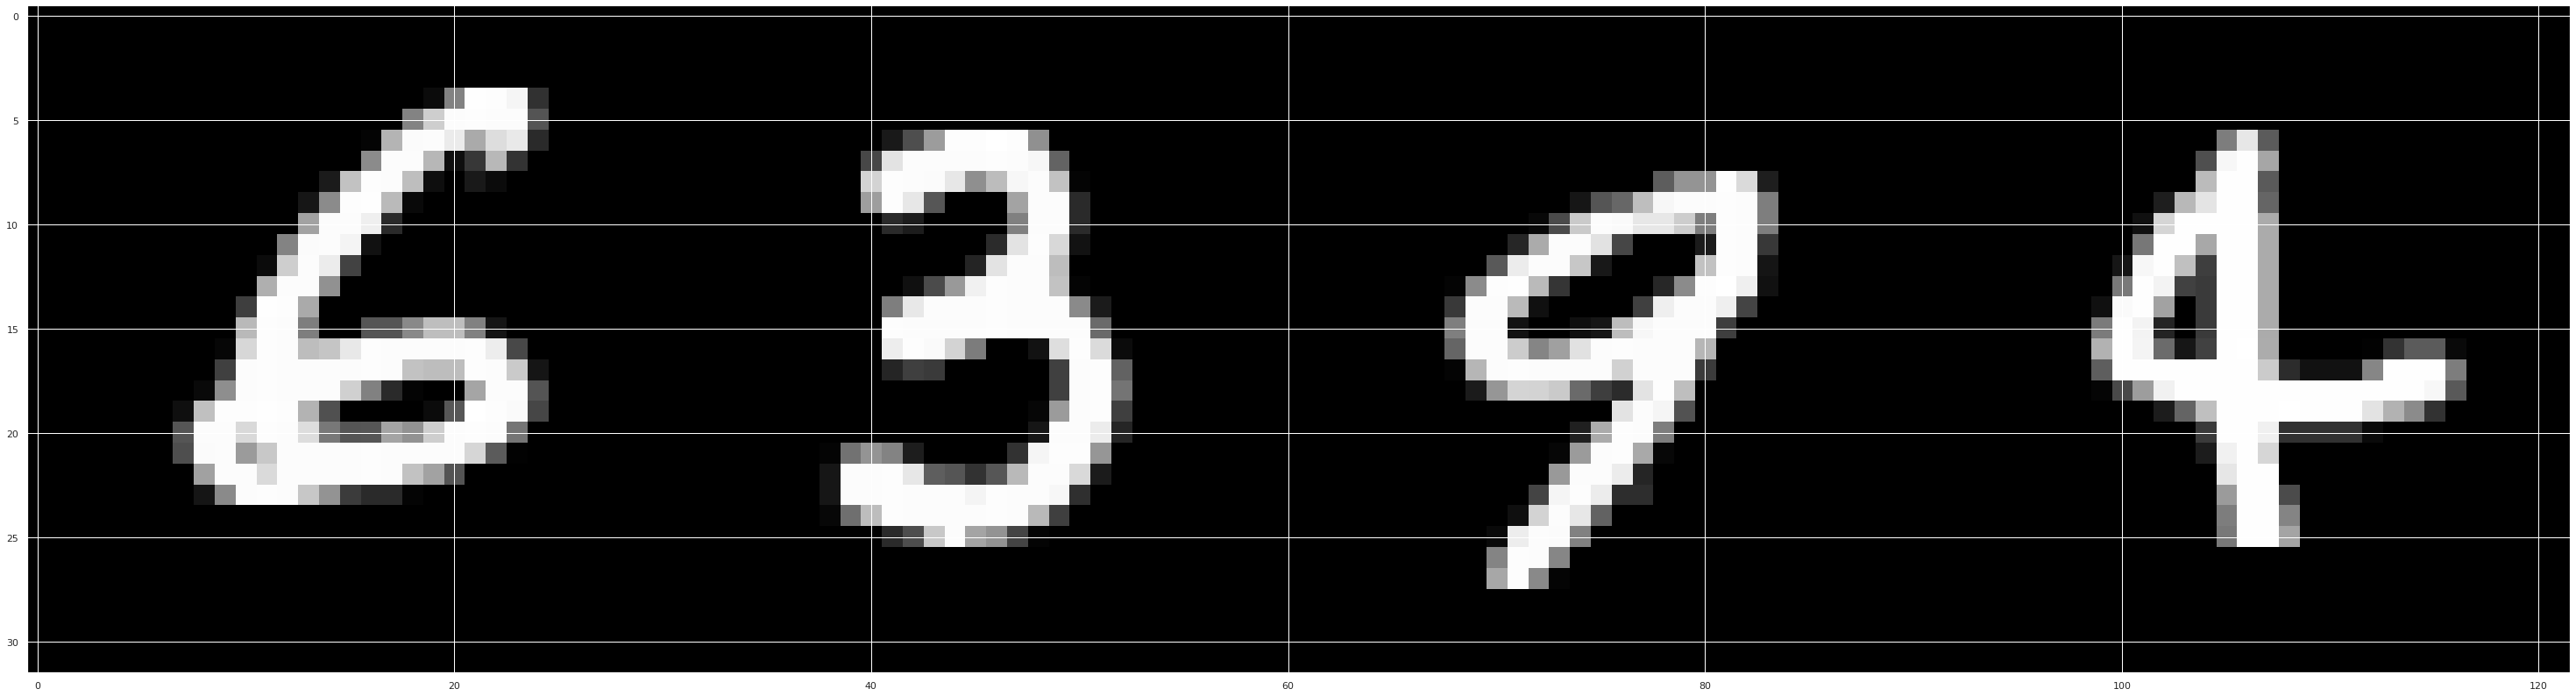

In [ ]:
data = iter(trainloader)
images, labels = data.next()
grid = torchvision.utils.make_grid(images)
print (" ".join([classes[labels[j]] for j in range(4)]))
plt.figure(figsize=(56,14))
plt.imshow(np.transpose(grid.numpy(),(1,2,0)))
plt.show()

#Taking one batch of 4 imahes and using torchvision grid to display together in a row
#The labels for the corresponding images are also printed out

In [ ]:
class My_Net(nn.Module):

  def __init__(self):
    super(My_Net,self).__init__()  #Check this 
    self.feedf = nn.Sequential(
        nn.Linear(784,48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.ReLU(),
        nn.Linear(24,10)
    )
    
  
  def forward(self,x):
    x1 = x.view(x.shape[0],-1)
    x2 = self.feedf(x1)
    return x2


#Here we've built a simple FeedForward network which does not use batchnormalization
#The forward function passes the inputs through the network of three layers

In [ ]:
class My_Net_BN(nn.Module):

  def __init__(self):
    super(My_Net_BN,self).__init__()  #Check this 
    self.feedf = nn.Sequential(
        nn.Linear(784,48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24,10)
    )
    
  
  def forward(self,x):
    x1 = x.view(x.shape[0],-1)
    x2 = self.feedf(x1)
    return x2

#This is similar to the network we have created earlier but the difference is that batchnormalization is applied after the first and the second layers
#Batchnormalization is a technique commonly used in Deep neural networks that standardizes the data to be input to the network
#Standardization is a statistical technique which ensures the data being used is internally consistent
#Batchnormalization is helpful in stabilizing the learning process and significantly reduces the load on the network
#Consequently better and faster training is possible
#We will compare the performance of these two networks

In [ ]:
device = torch.device('cuda')
trainloader2 = torch.utils.data.DataLoader(trainset,batch_size=512,shuffle=True)

#Enabling GPU hardware and creating a dataloader to load images in batches of 512

In [ ]:
network = My_Net()
network.to(device)
network_bn = My_Net_BN()
network_bn.to(device)
loss_func = nn.CrossEntropyLoss()
opt = optim.SGD(network.parameters(),lr=0.001)
opt_bn = optim.SGD(network_bn.parameters(),lr = 0.001)

#Instantiating networks, setting loss criteria and optimizers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Epoch: 1
10 batches        W/o Normalization:  2.319622278213501         Normalization:  2.276562213897705


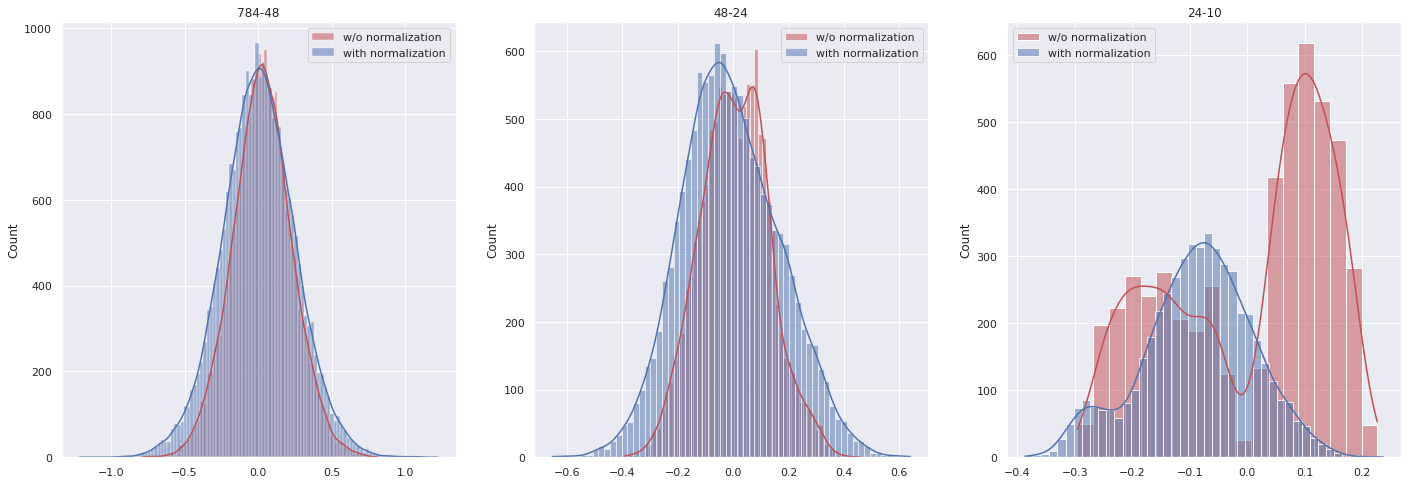

20 batches        W/o Normalization:  2.316585063934326         Normalization:  2.2501168251037598


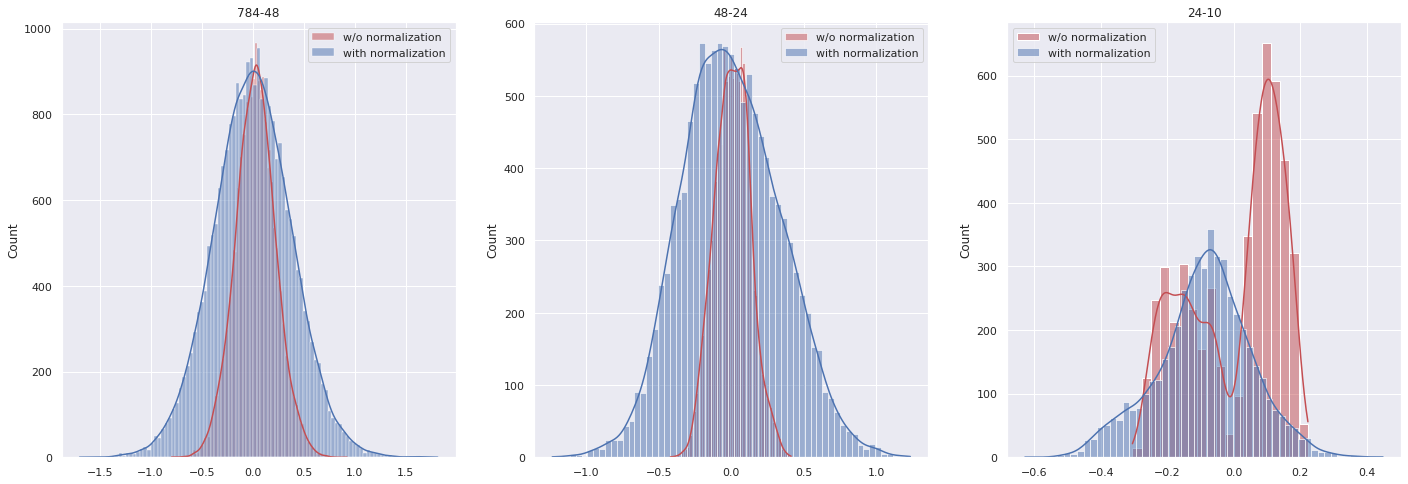

30 batches        W/o Normalization:  2.324629068374634         Normalization:  2.2025036811828613


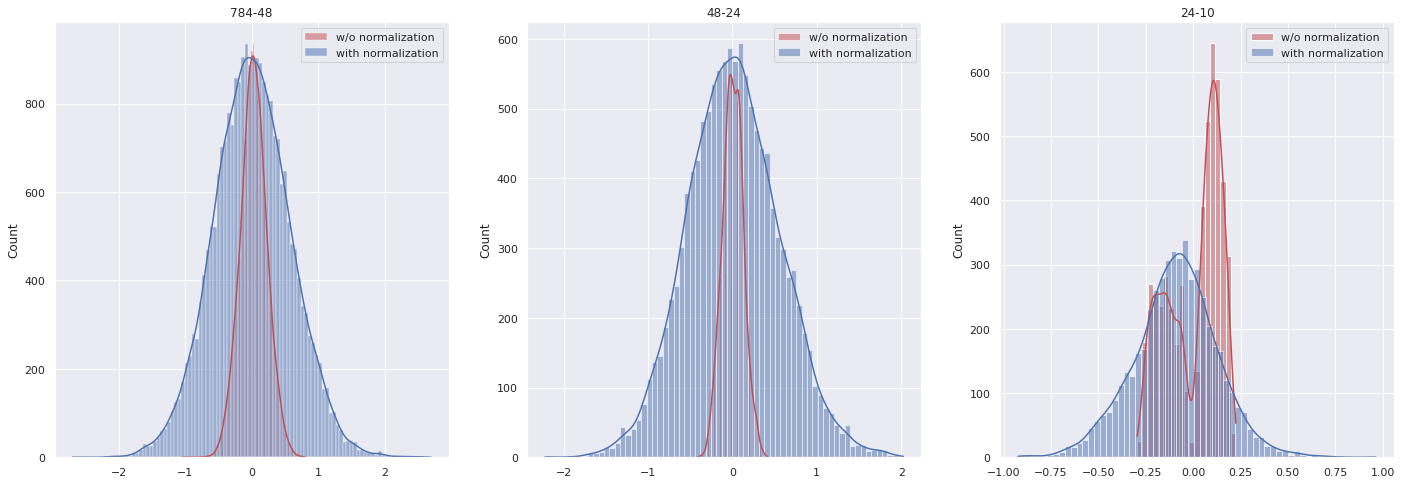

40 batches        W/o Normalization:  2.3166370391845703         Normalization:  2.1784133911132812


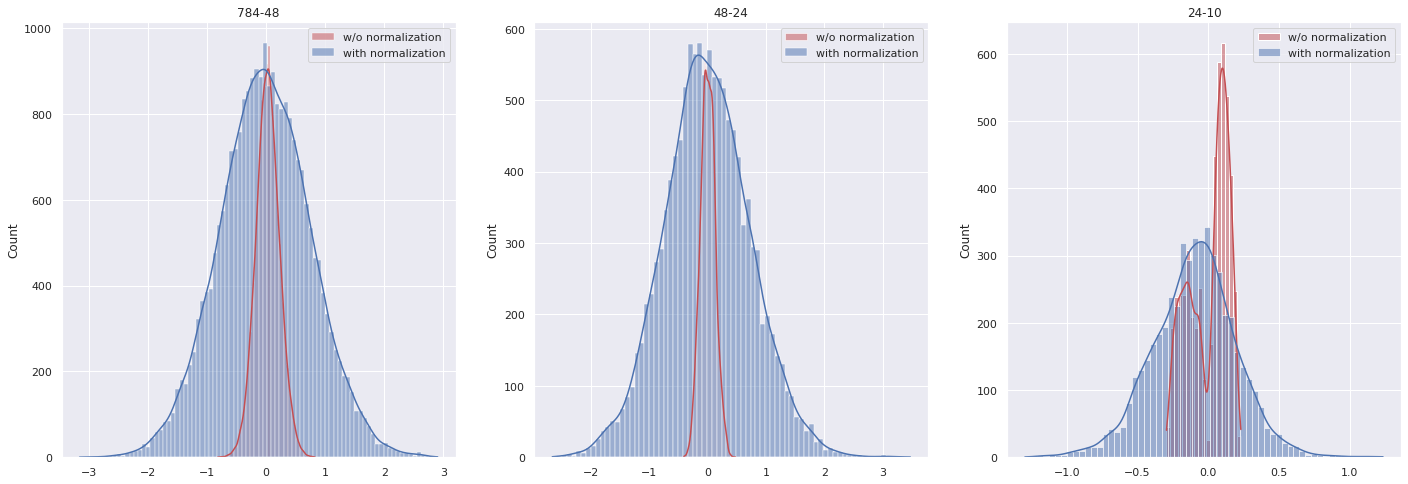

50 batches        W/o Normalization:  2.3225765228271484         Normalization:  2.150303840637207


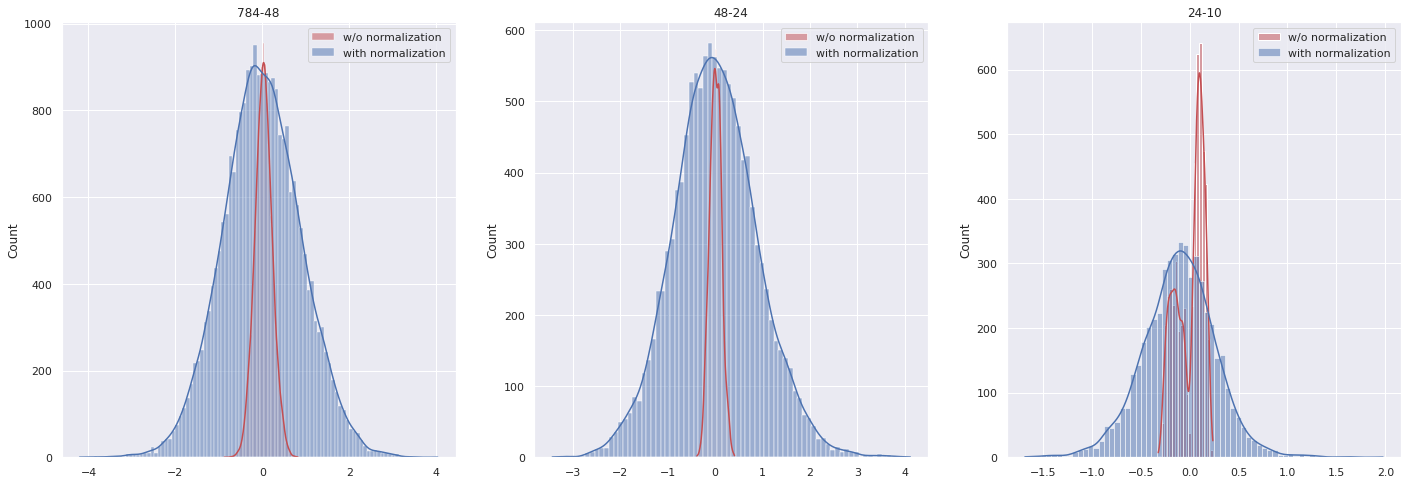

60 batches        W/o Normalization:  2.3259811401367188         Normalization:  2.1086130142211914


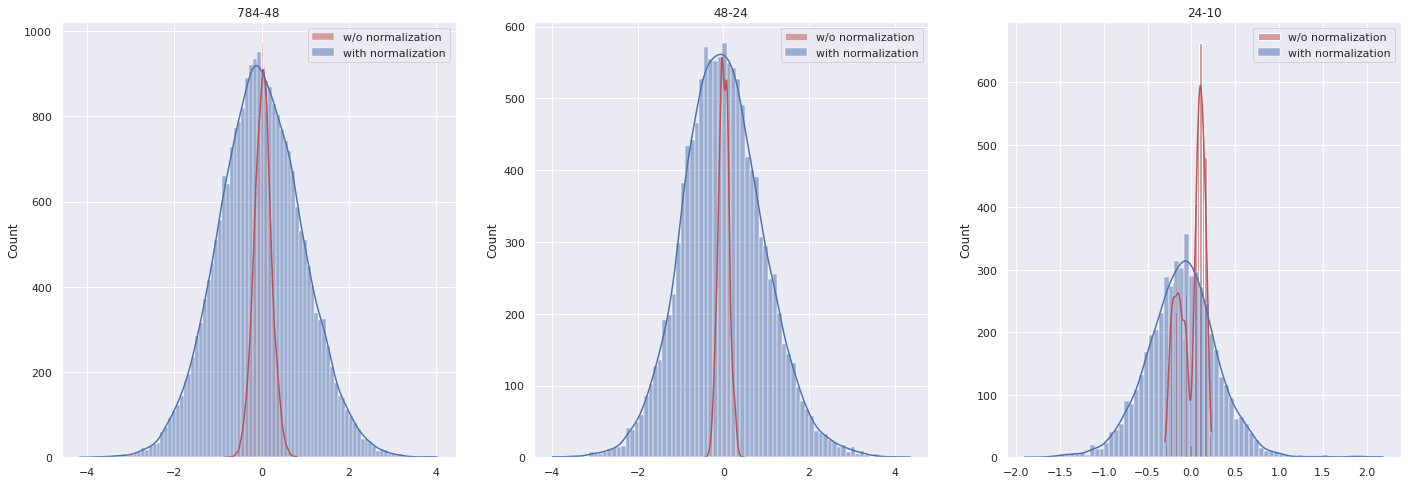

70 batches        W/o Normalization:  2.318432092666626         Normalization:  2.092315435409546


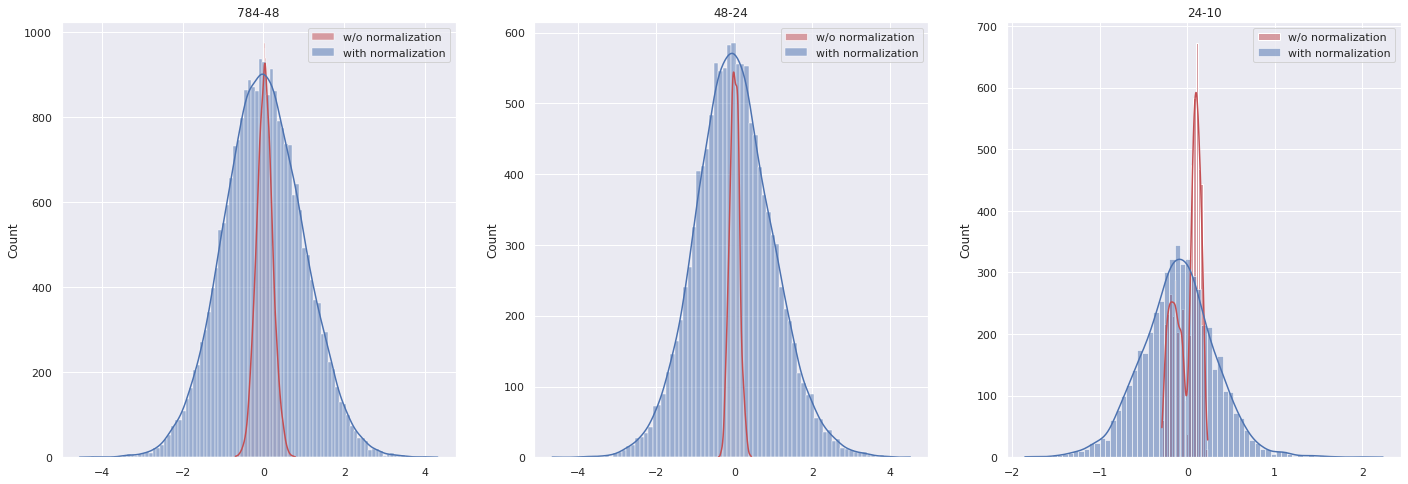

80 batches        W/o Normalization:  2.3147919178009033         Normalization:  2.05106258392334


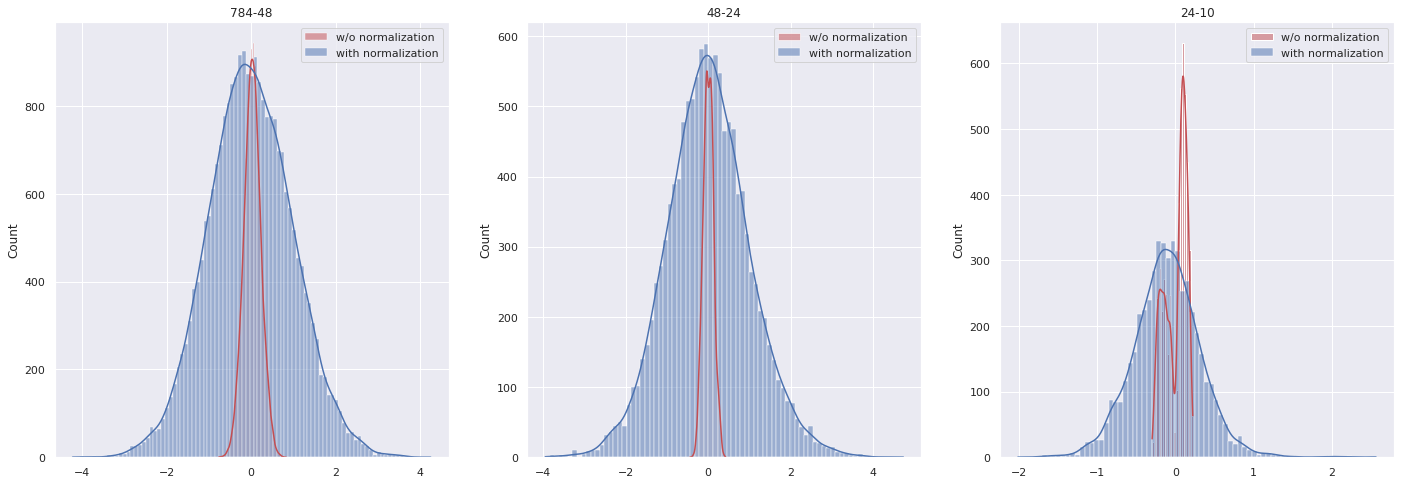

90 batches        W/o Normalization:  2.3282971382141113         Normalization:  2.019956350326538


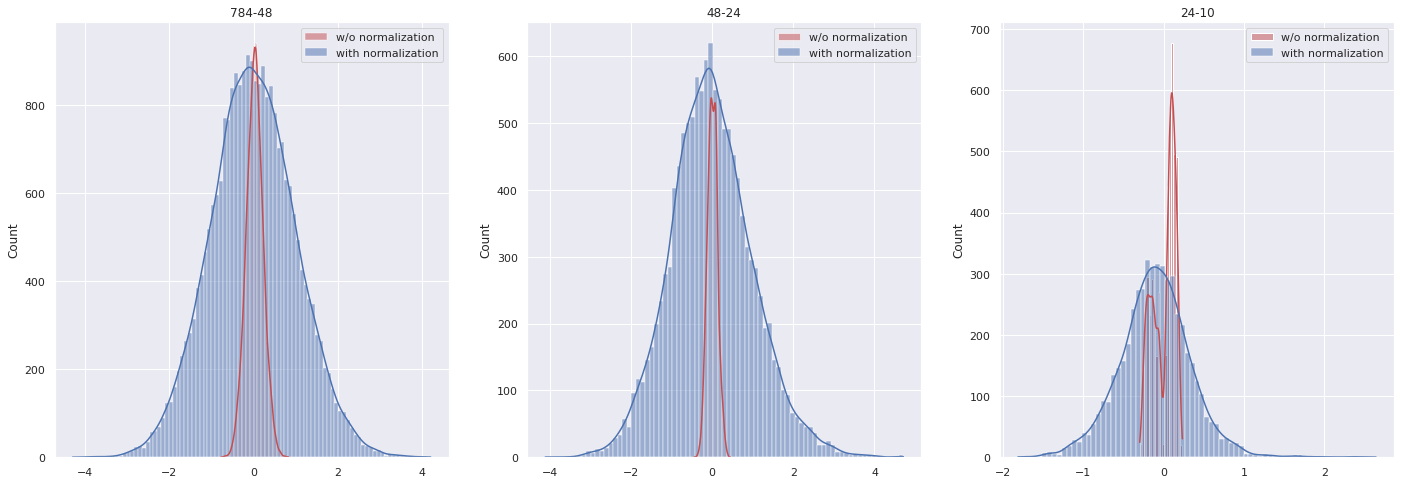

100 batches        W/o Normalization:  2.313490629196167         Normalization:  1.9957661628723145


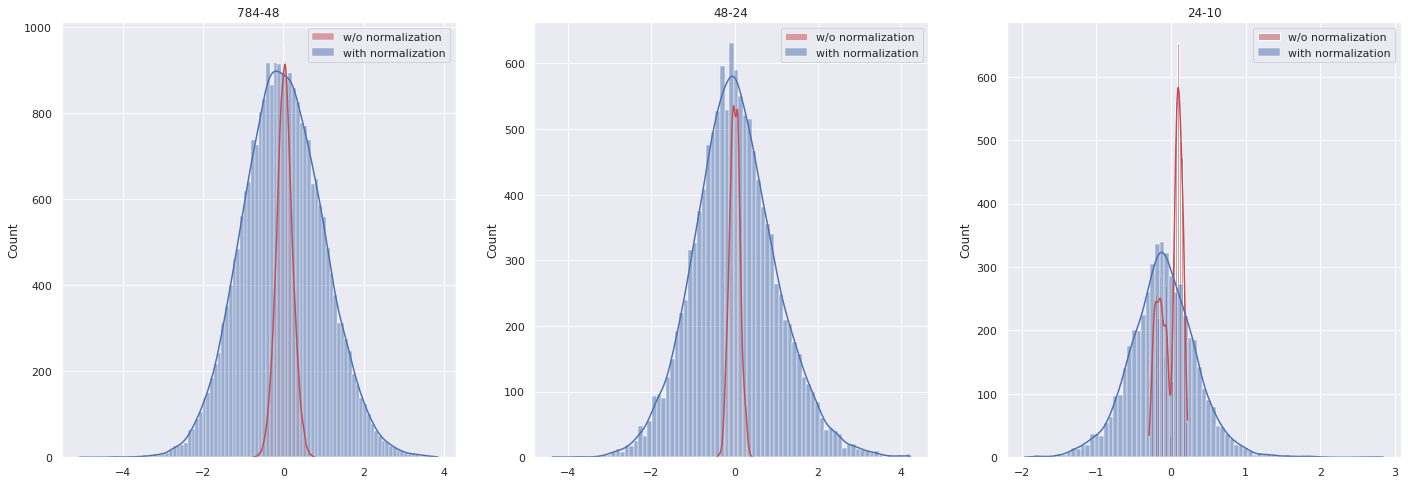

110 batches        W/o Normalization:  2.3305838108062744         Normalization:  1.9696316719055176


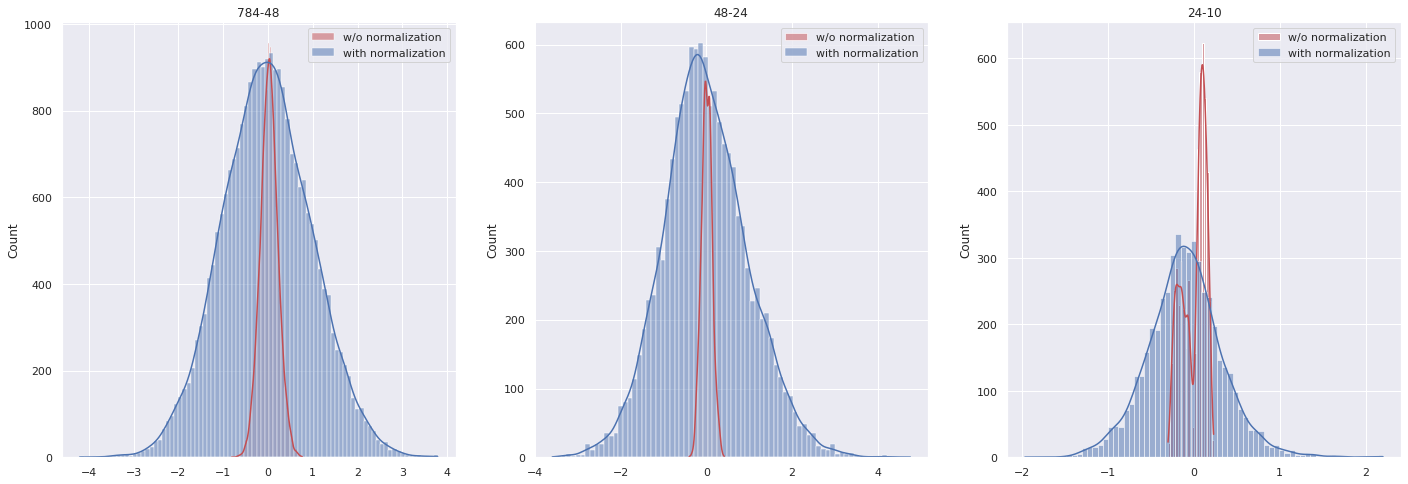

Epoch: 2
10 batches        W/o Normalization:  2.319279909133911         Normalization:  1.974225401878357


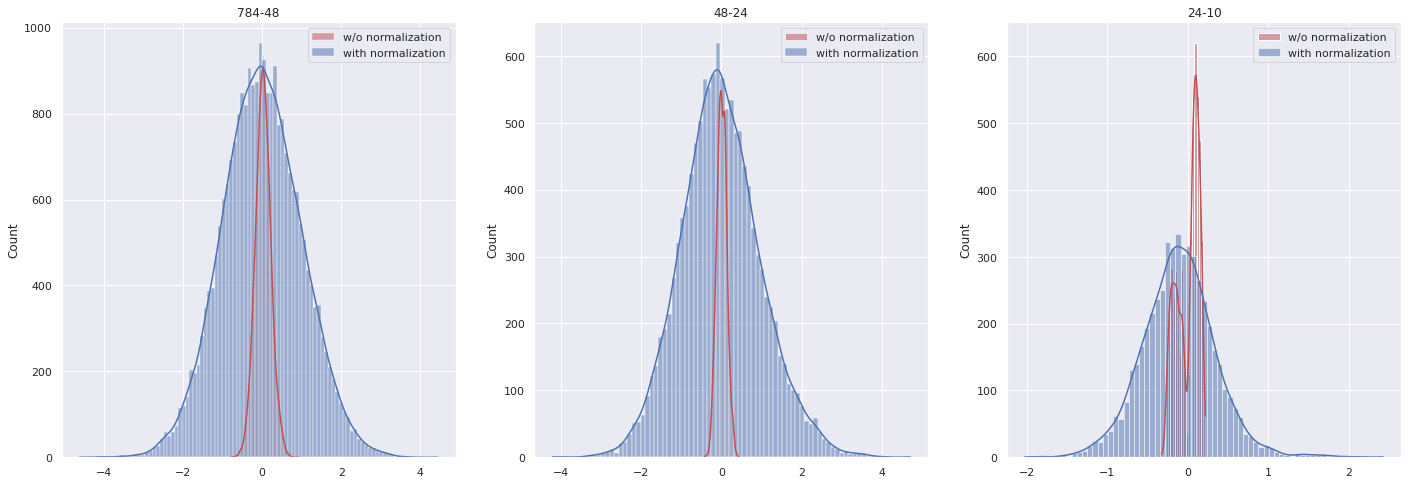

20 batches        W/o Normalization:  2.322812080383301         Normalization:  1.926867961883545


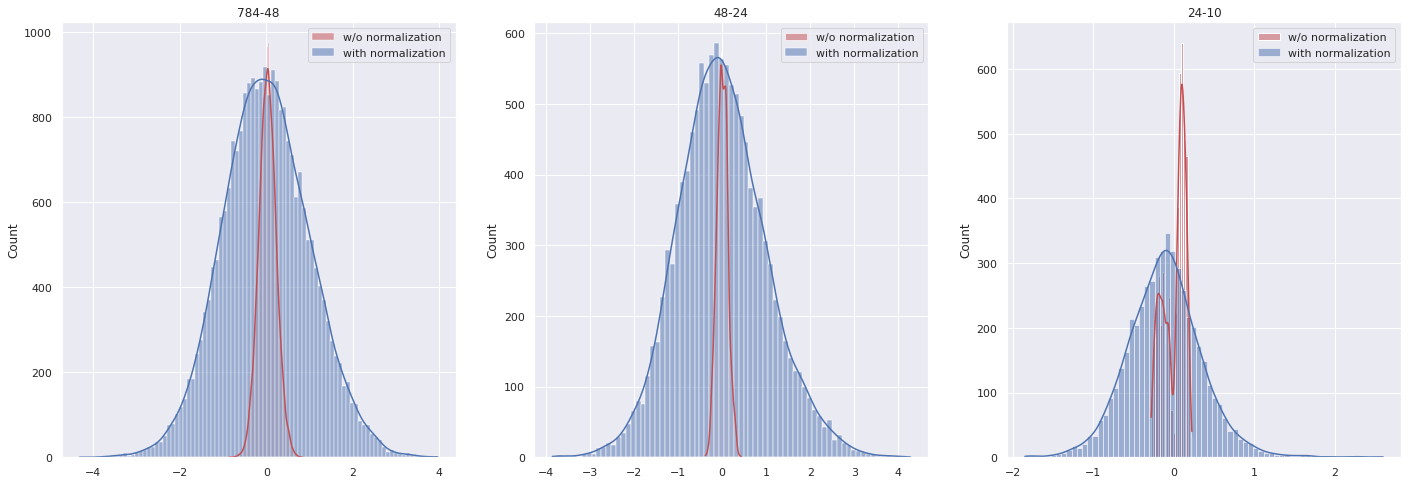

30 batches        W/o Normalization:  2.3050379753112793         Normalization:  1.9067147970199585


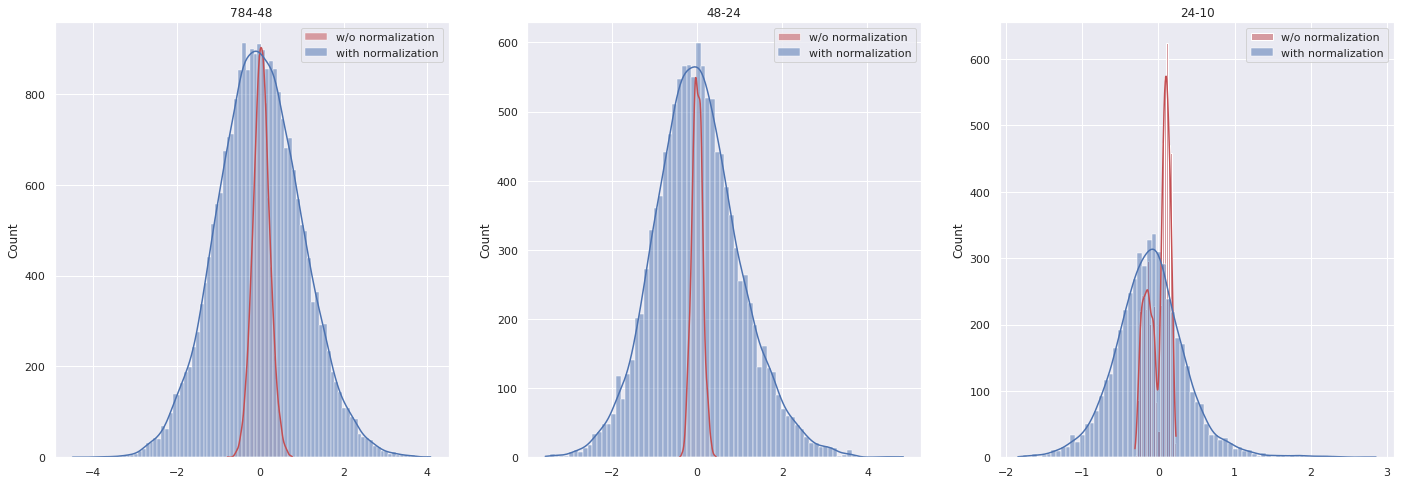

40 batches        W/o Normalization:  2.3182120323181152         Normalization:  1.886071801185608


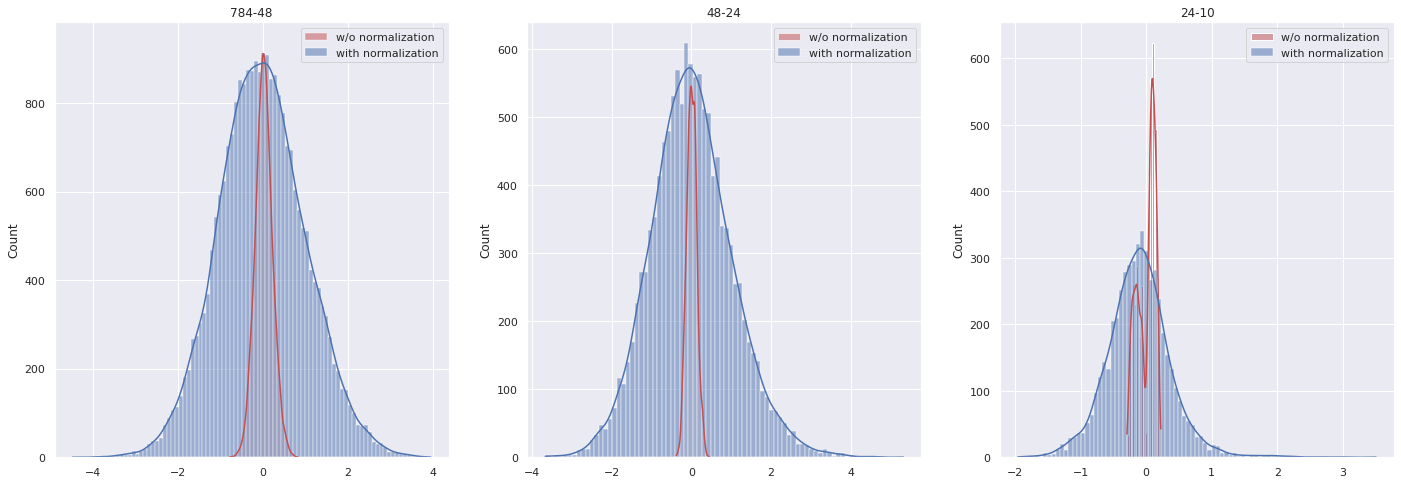

50 batches        W/o Normalization:  2.3158161640167236         Normalization:  1.862383246421814


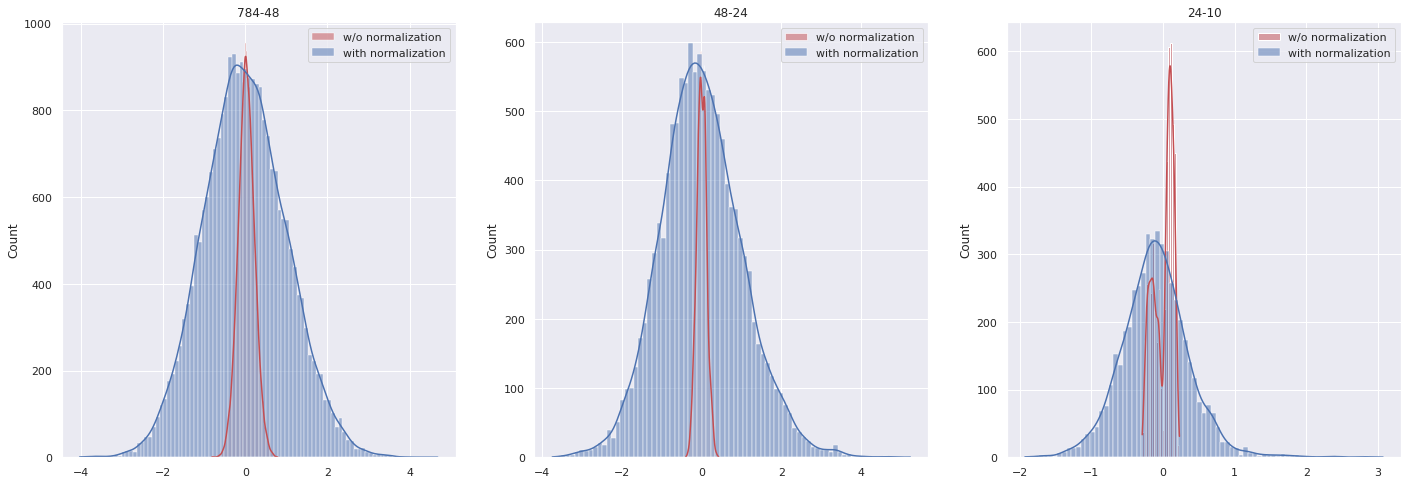

60 batches        W/o Normalization:  2.318459987640381         Normalization:  1.8534317016601562


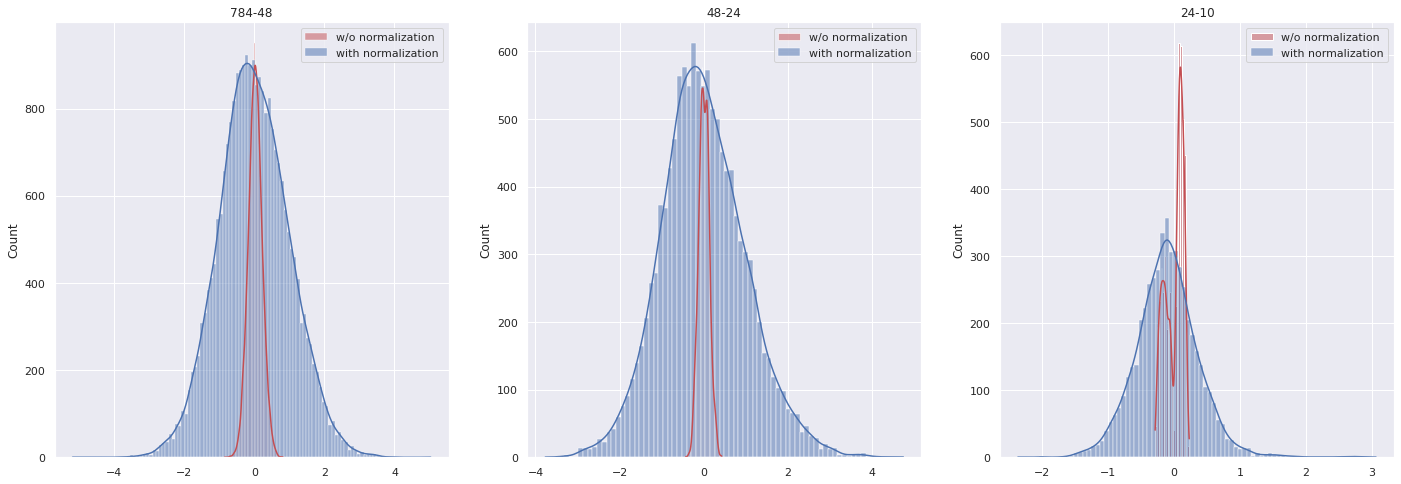

70 batches        W/o Normalization:  2.327010154724121         Normalization:  1.8701293468475342


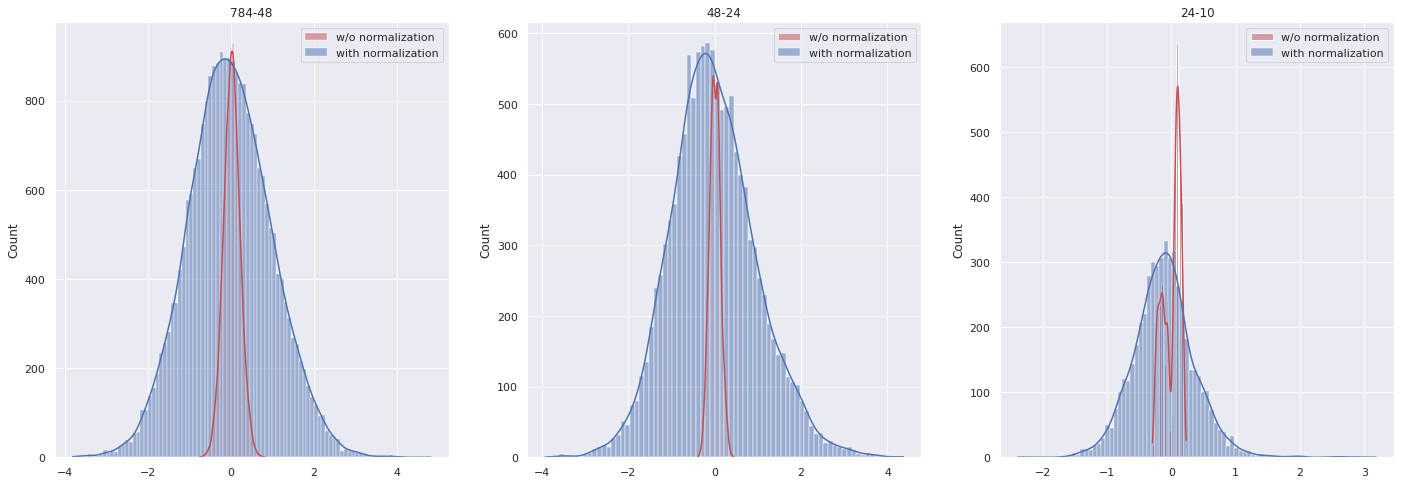

80 batches        W/o Normalization:  2.314199924468994         Normalization:  1.8389954566955566


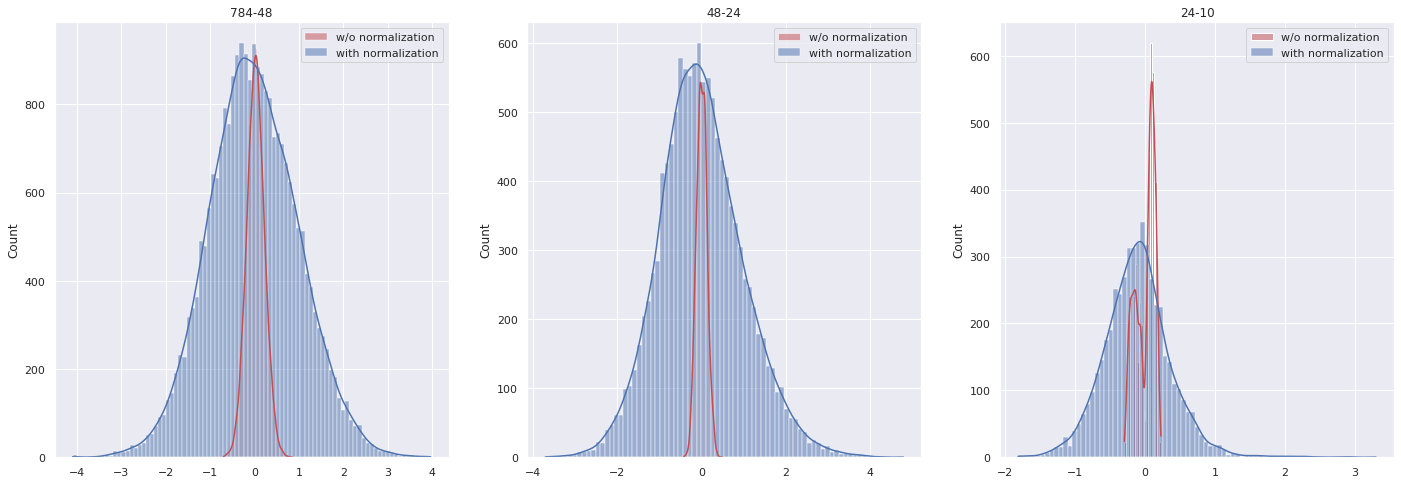

90 batches        W/o Normalization:  2.309412956237793         Normalization:  1.7719359397888184


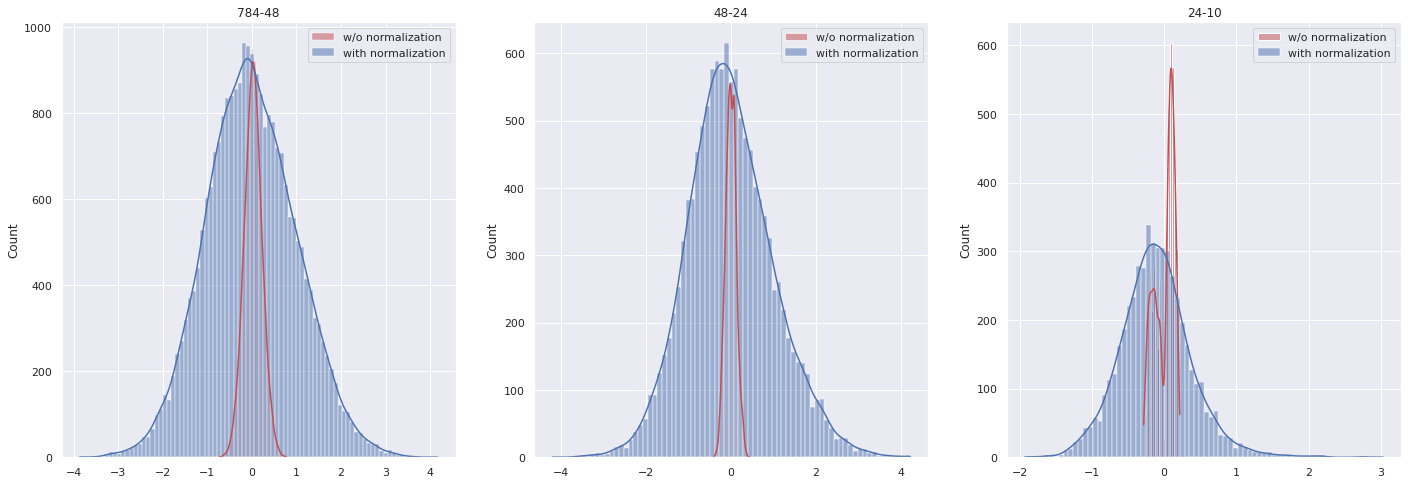

100 batches        W/o Normalization:  2.3054285049438477         Normalization:  1.808127522468567


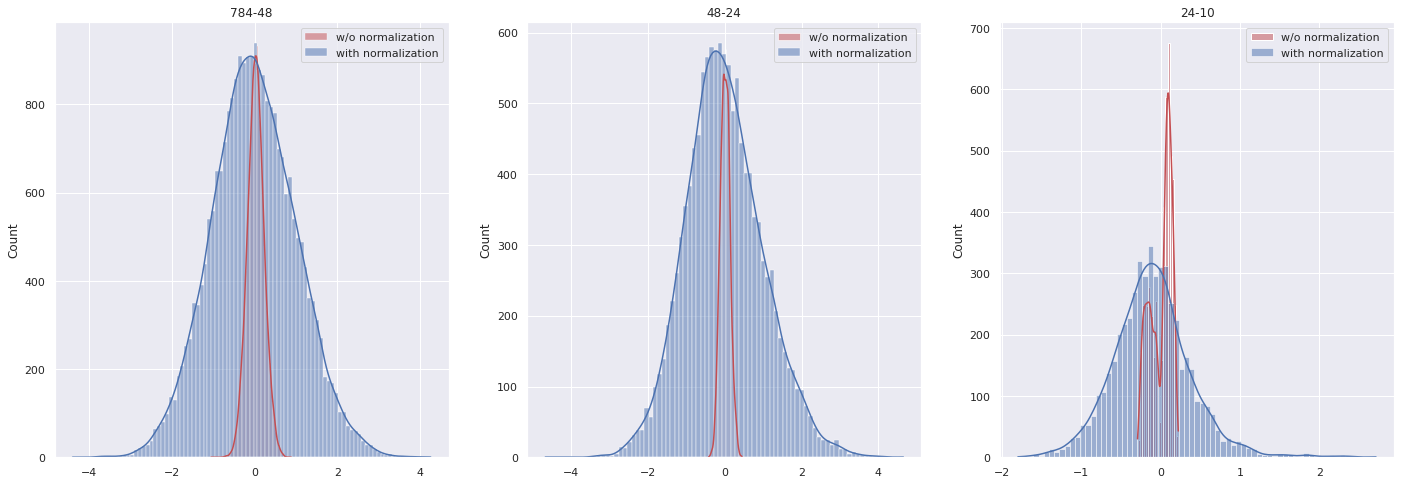

110 batches        W/o Normalization:  2.312178134918213         Normalization:  1.7974224090576172


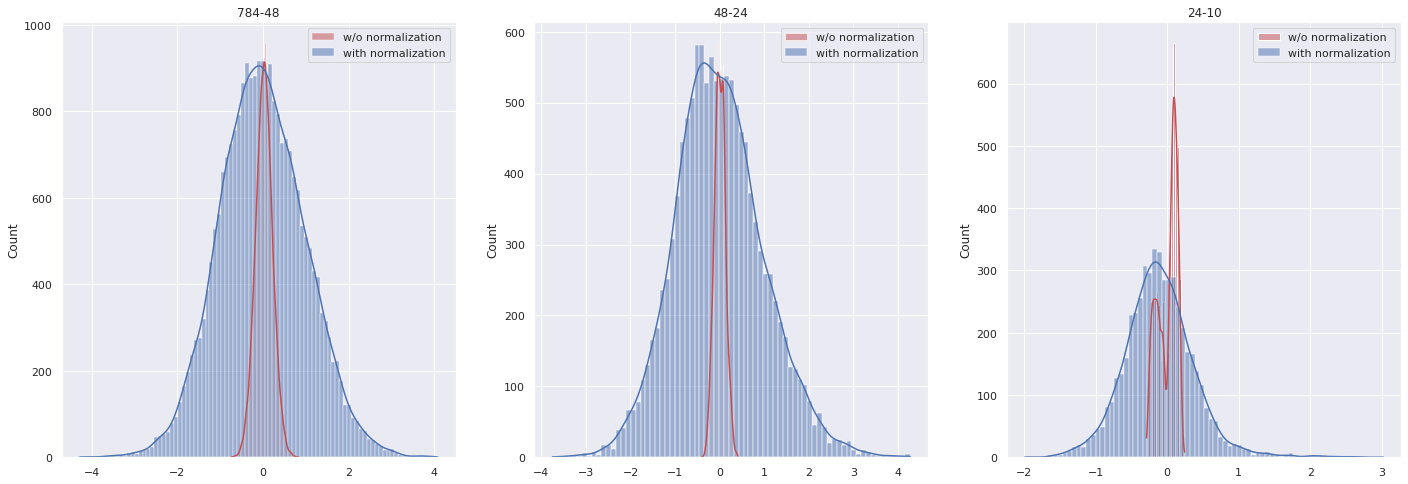

Epoch: 3
10 batches        W/o Normalization:  2.3054134845733643         Normalization:  1.789336919784546


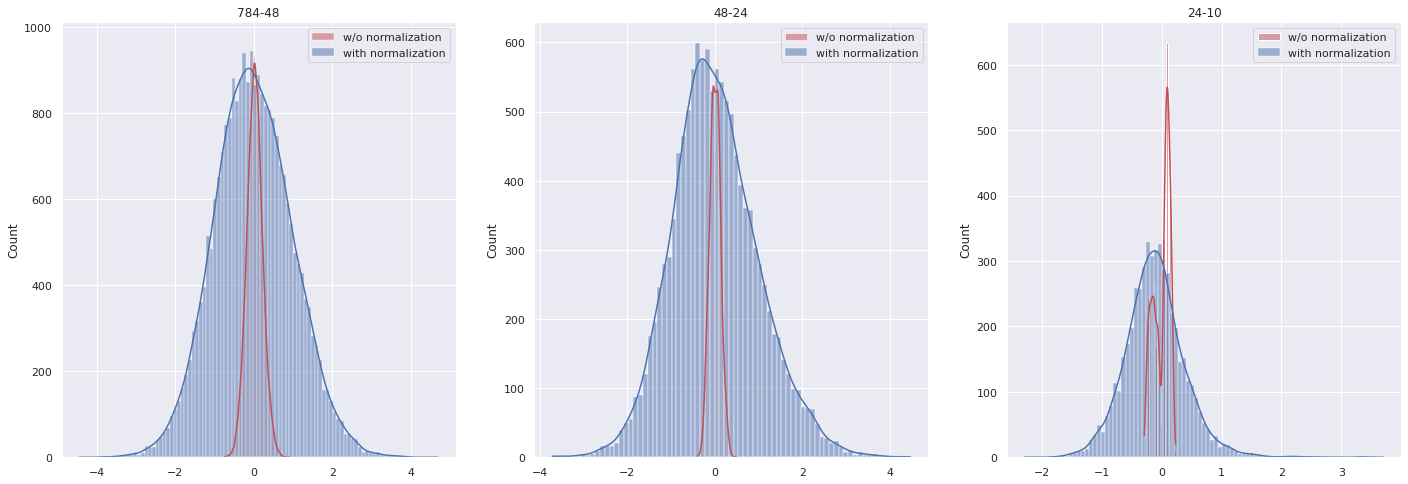

20 batches        W/o Normalization:  2.317497730255127         Normalization:  1.7759051322937012


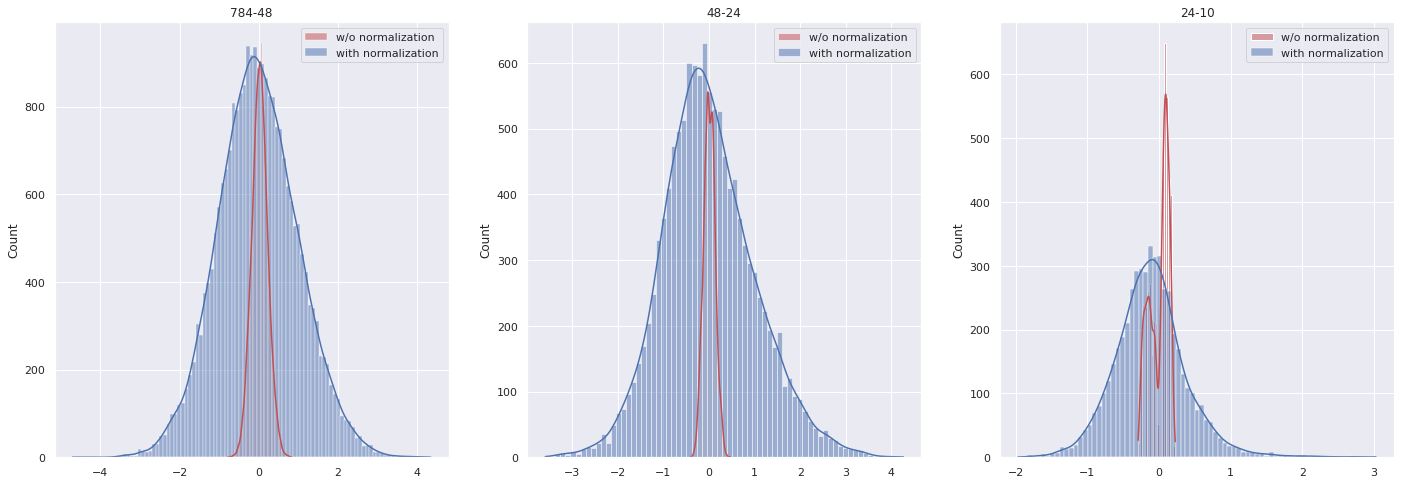

30 batches        W/o Normalization:  2.3202292919158936         Normalization:  1.7492879629135132


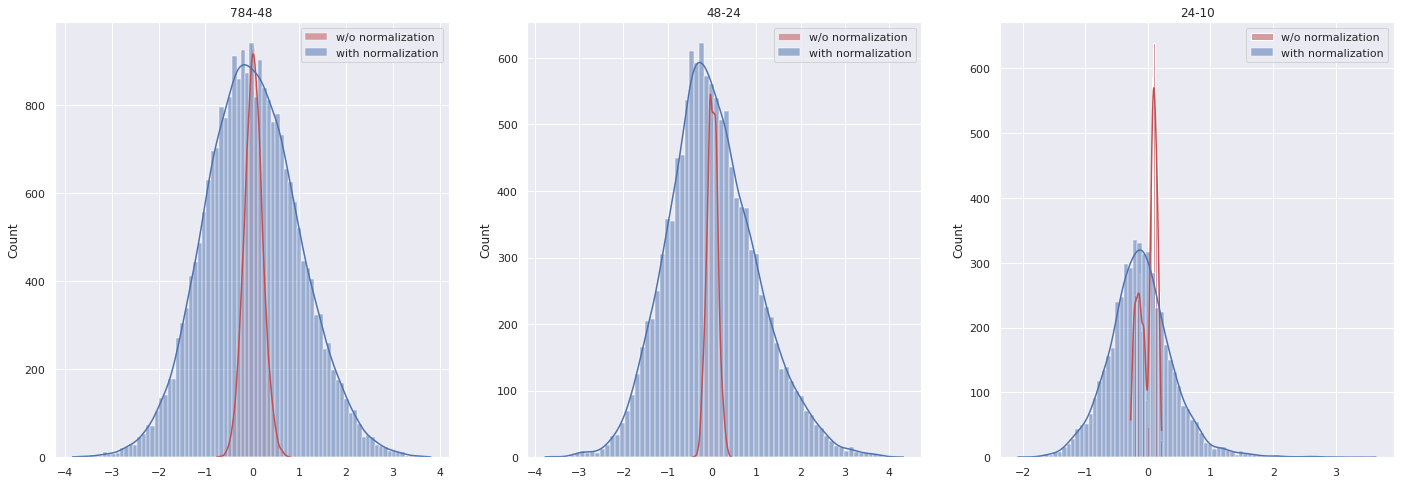

40 batches        W/o Normalization:  2.332578659057617         Normalization:  1.7696181535720825


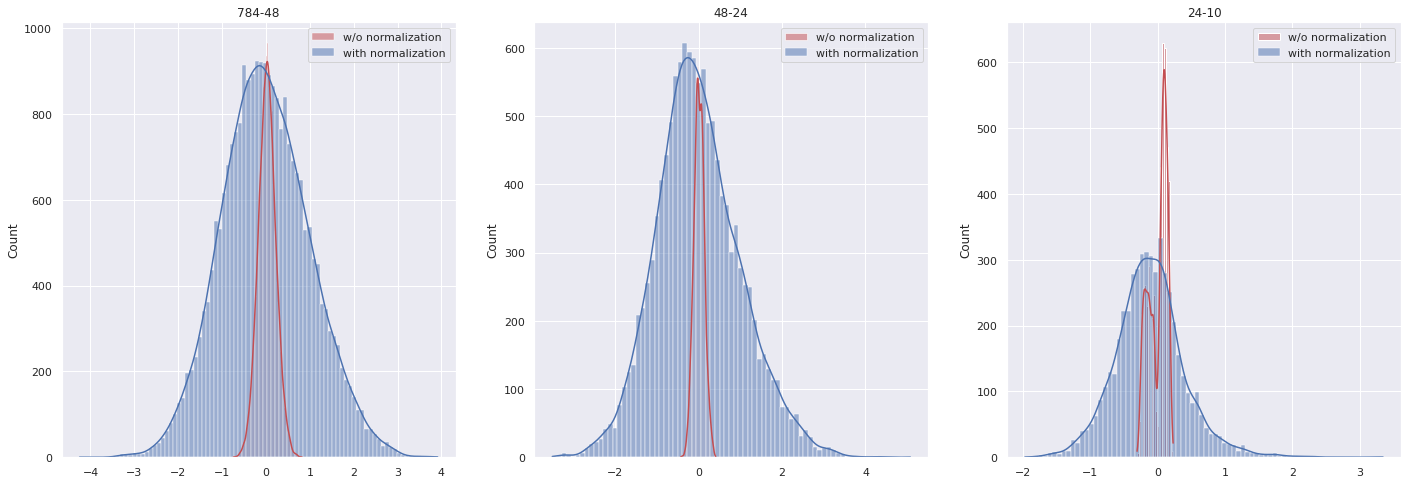

50 batches        W/o Normalization:  2.313809633255005         Normalization:  1.7259045839309692


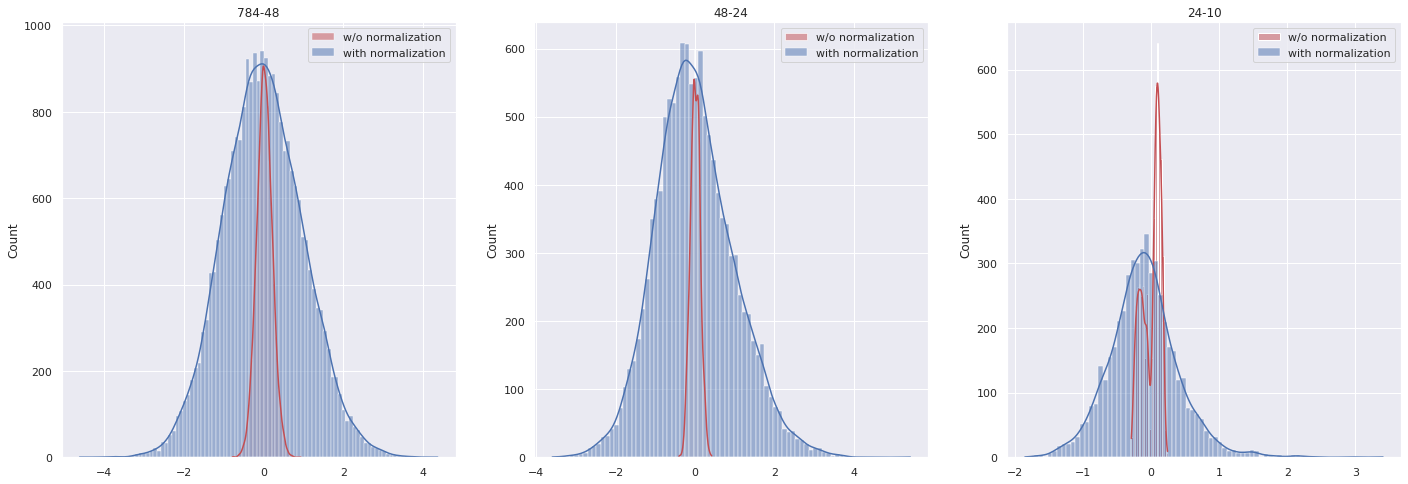

60 batches        W/o Normalization:  2.313758134841919         Normalization:  1.7358101606369019


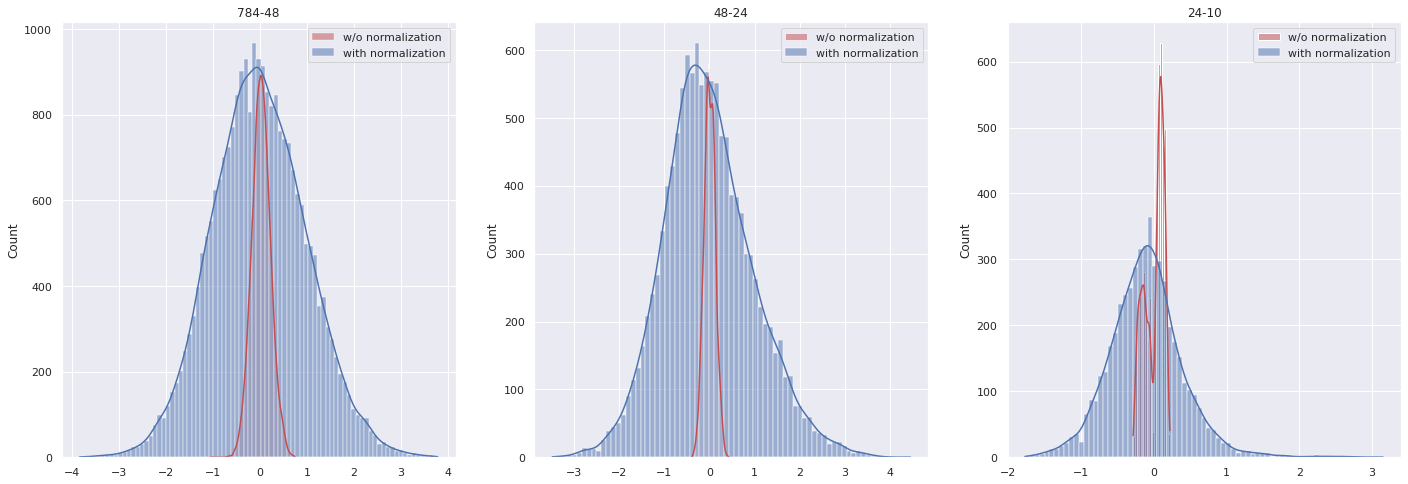

70 batches        W/o Normalization:  2.3145761489868164         Normalization:  1.750268578529358


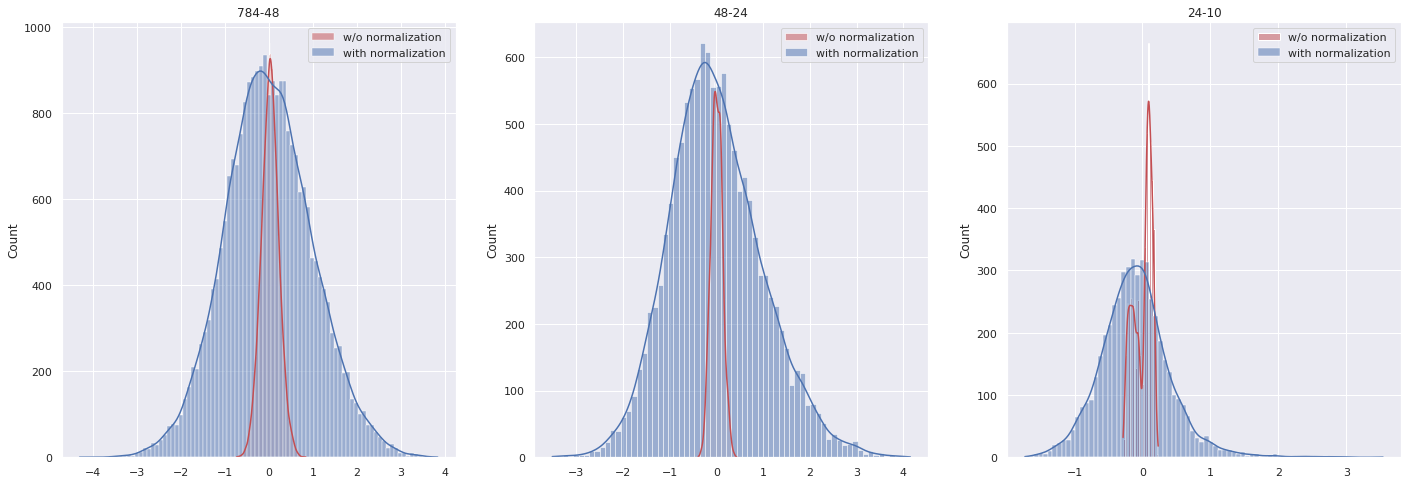

80 batches        W/o Normalization:  2.3086764812469482         Normalization:  1.6990718841552734


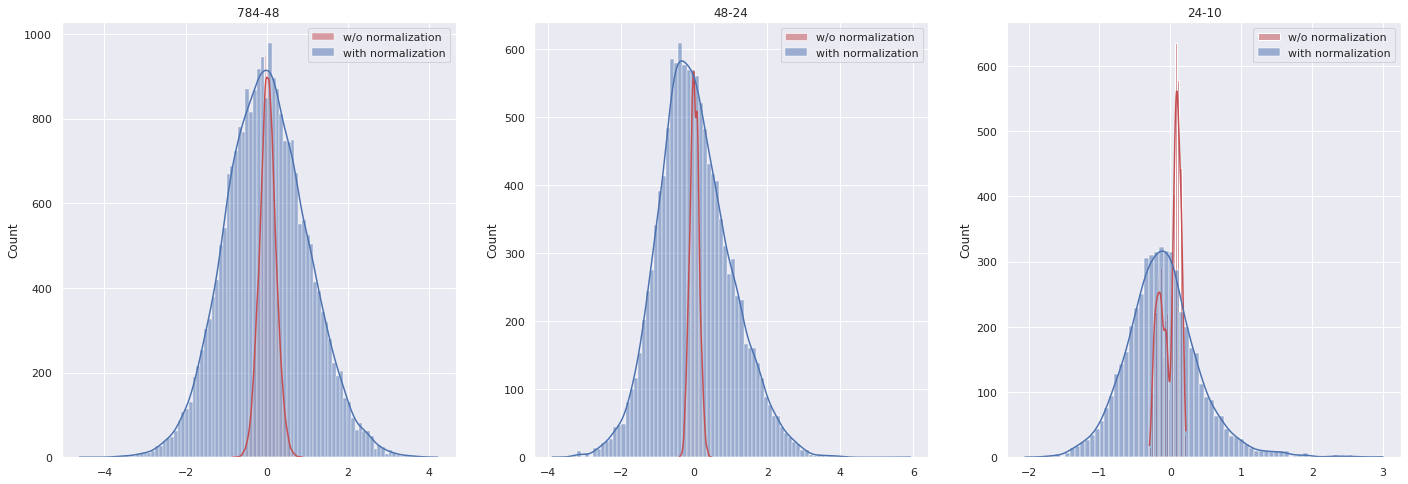

90 batches        W/o Normalization:  2.3183484077453613         Normalization:  1.7037626504898071


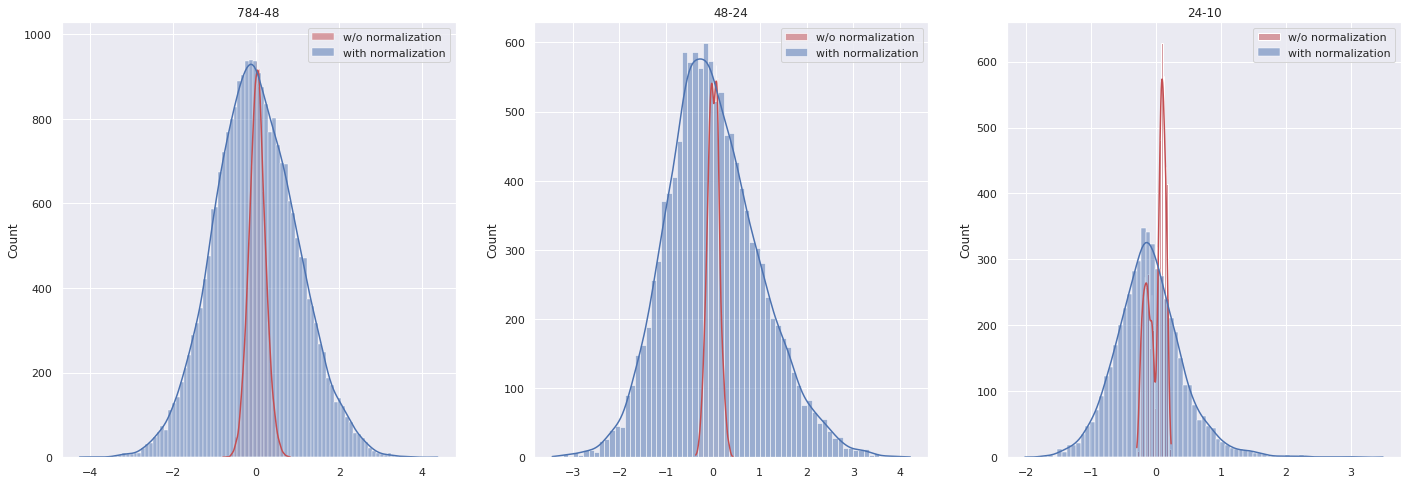

100 batches        W/o Normalization:  2.3071205615997314         Normalization:  1.6544417142868042


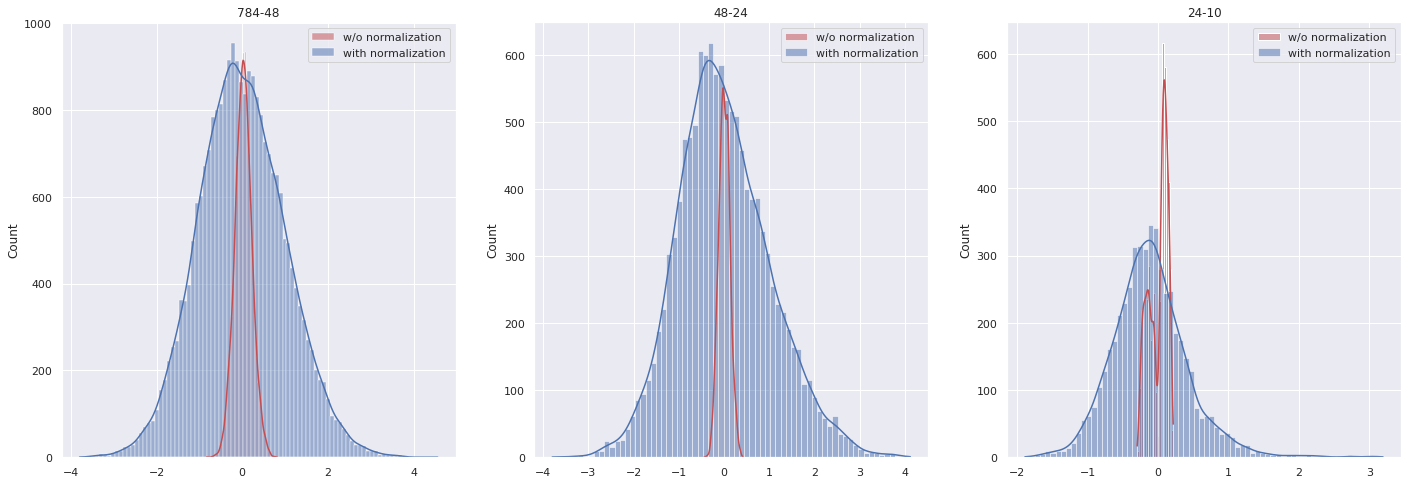

110 batches        W/o Normalization:  2.3158178329467773         Normalization:  1.6494064331054688


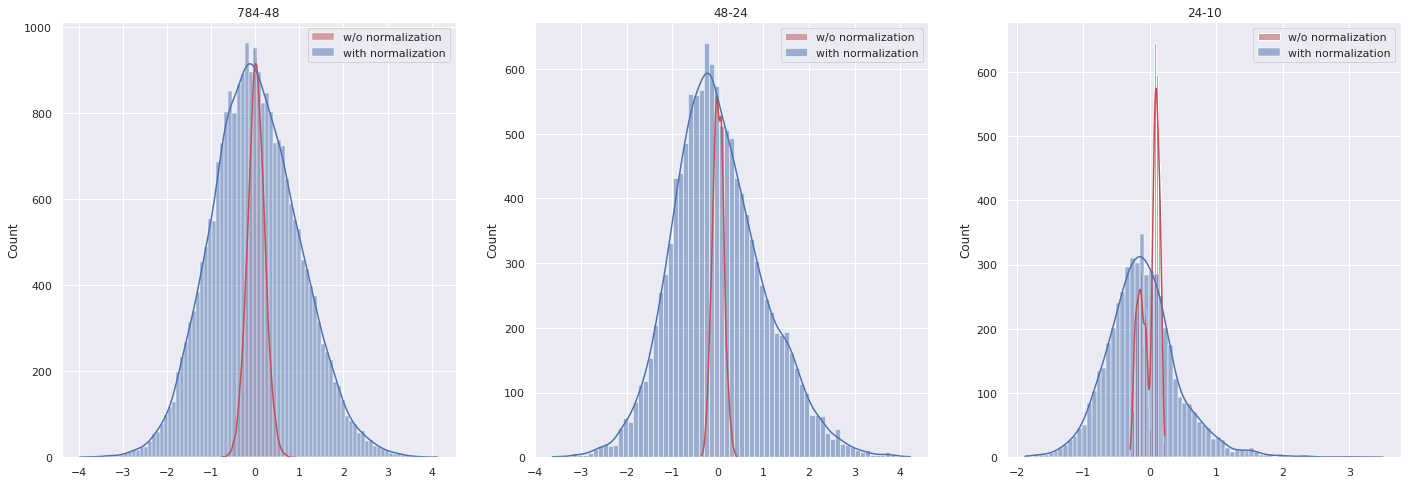

Epoch: 4
10 batches        W/o Normalization:  2.307413339614868         Normalization:  1.681311011314392


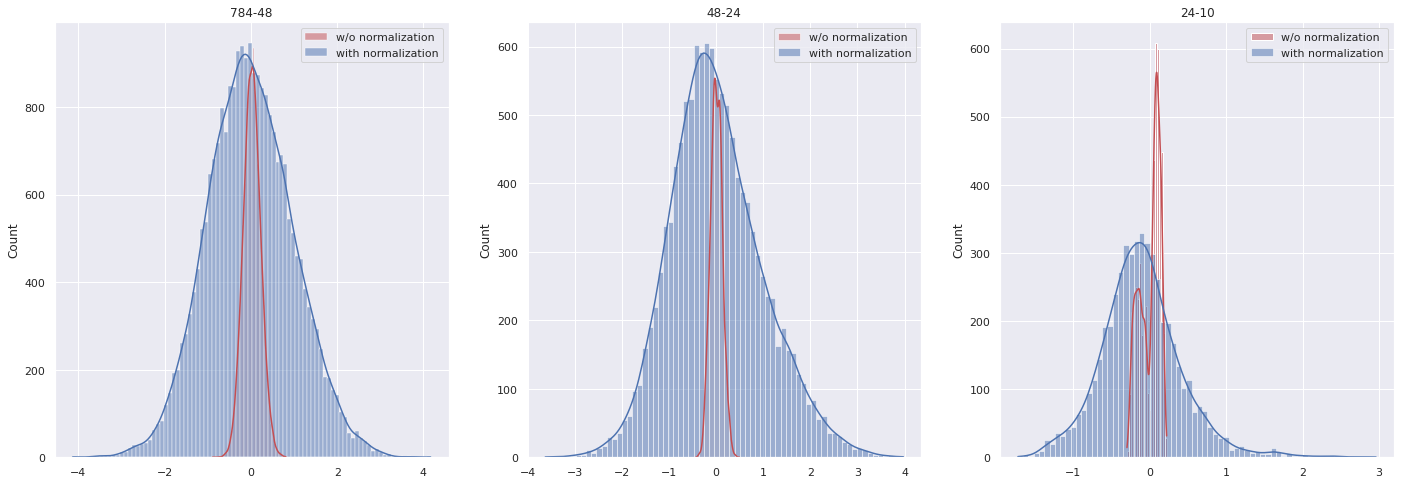

20 batches        W/o Normalization:  2.3091988563537598         Normalization:  1.6754199266433716


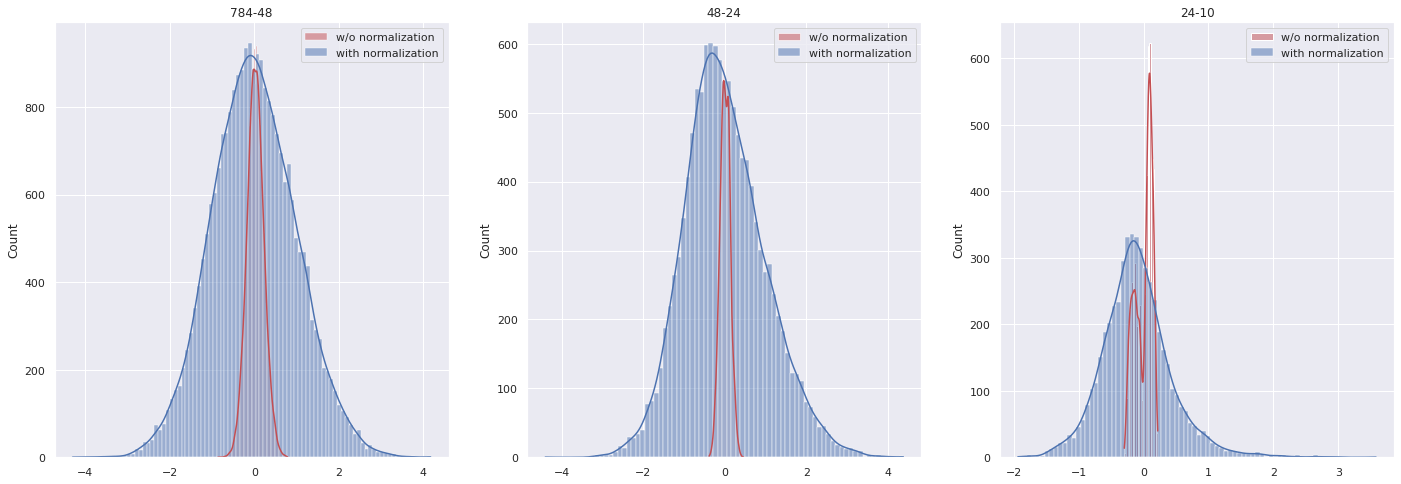

30 batches        W/o Normalization:  2.317389488220215         Normalization:  1.6584993600845337


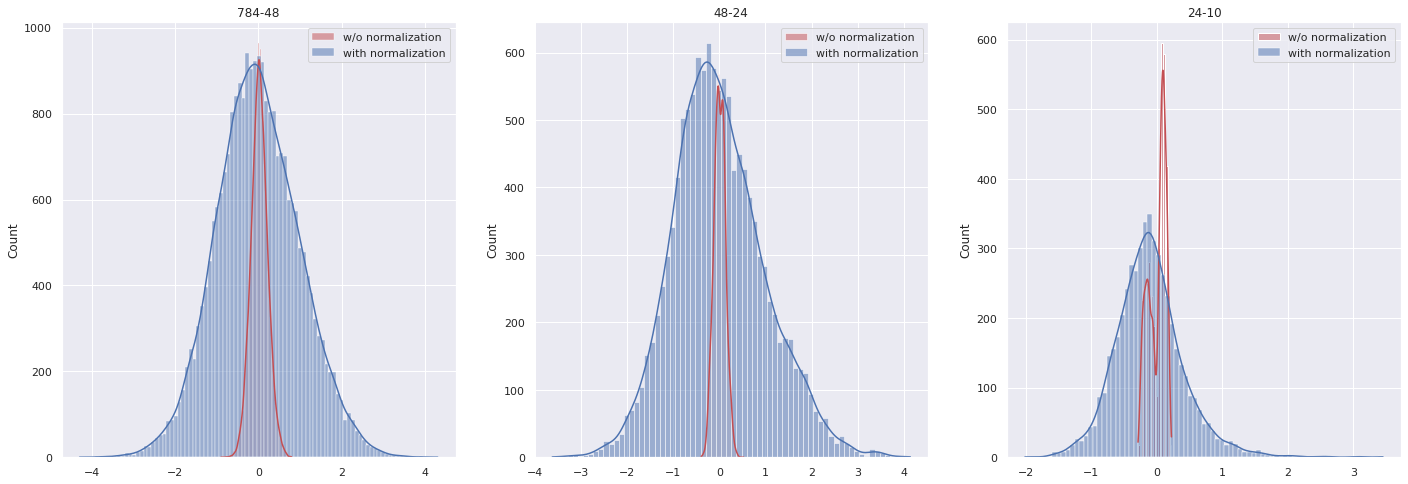

40 batches        W/o Normalization:  2.30961537361145         Normalization:  1.6397775411605835


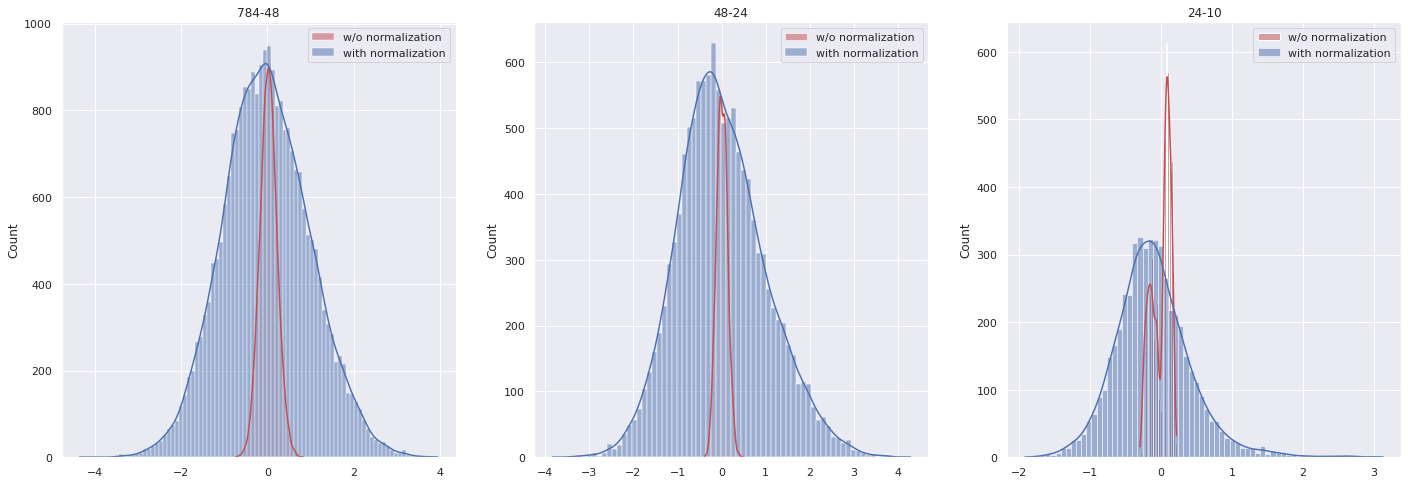

50 batches        W/o Normalization:  2.3078129291534424         Normalization:  1.6311793327331543


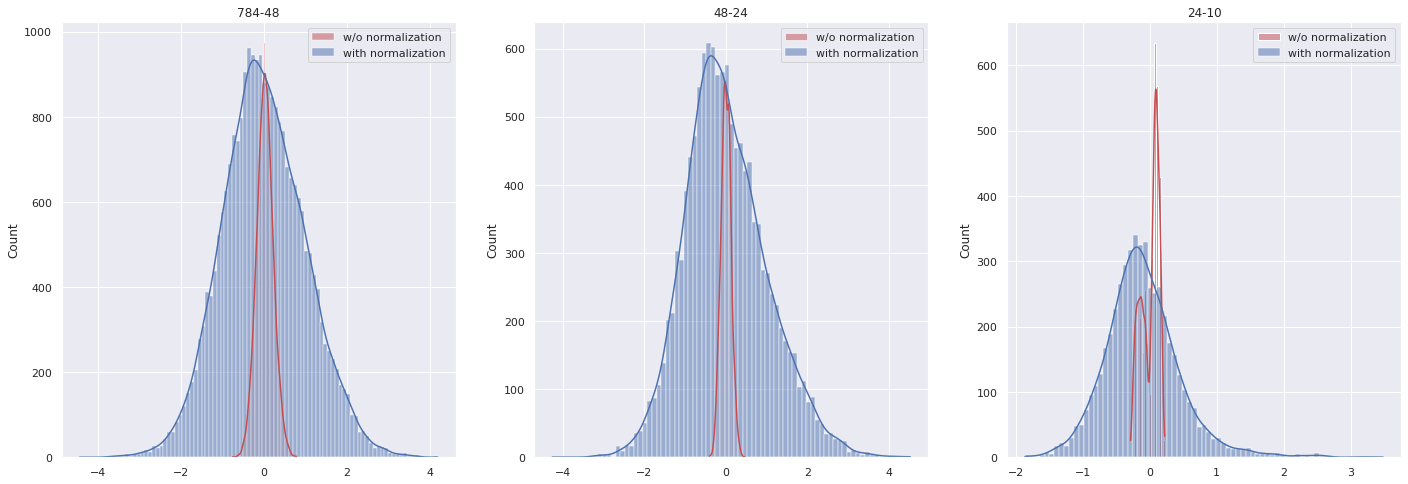

60 batches        W/o Normalization:  2.3039395809173584         Normalization:  1.6488174200057983


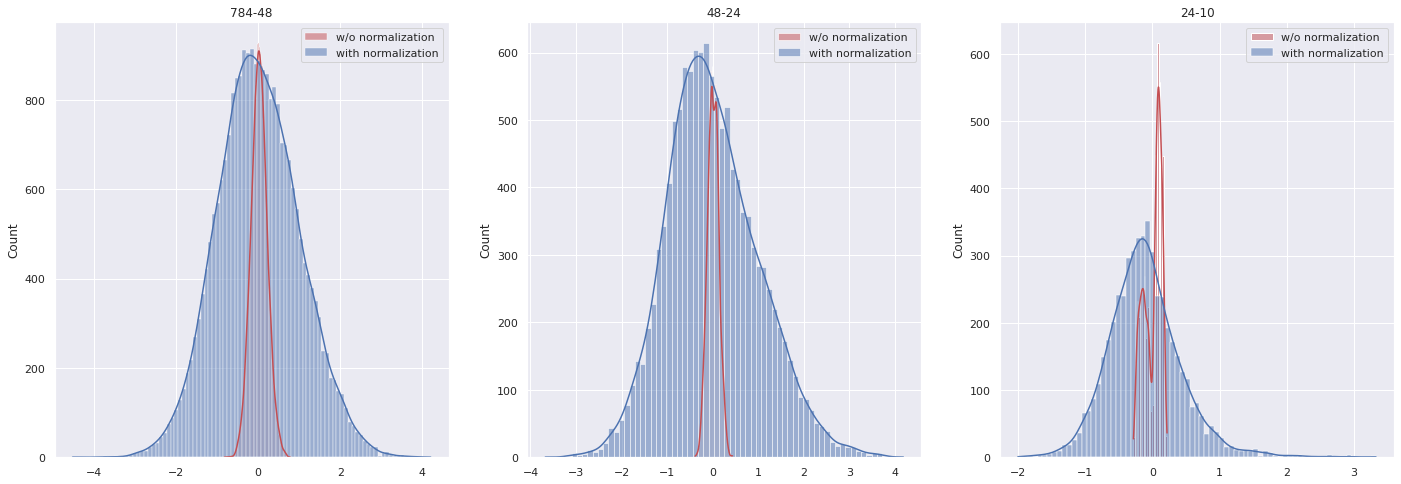

70 batches        W/o Normalization:  2.3109943866729736         Normalization:  1.6086987257003784


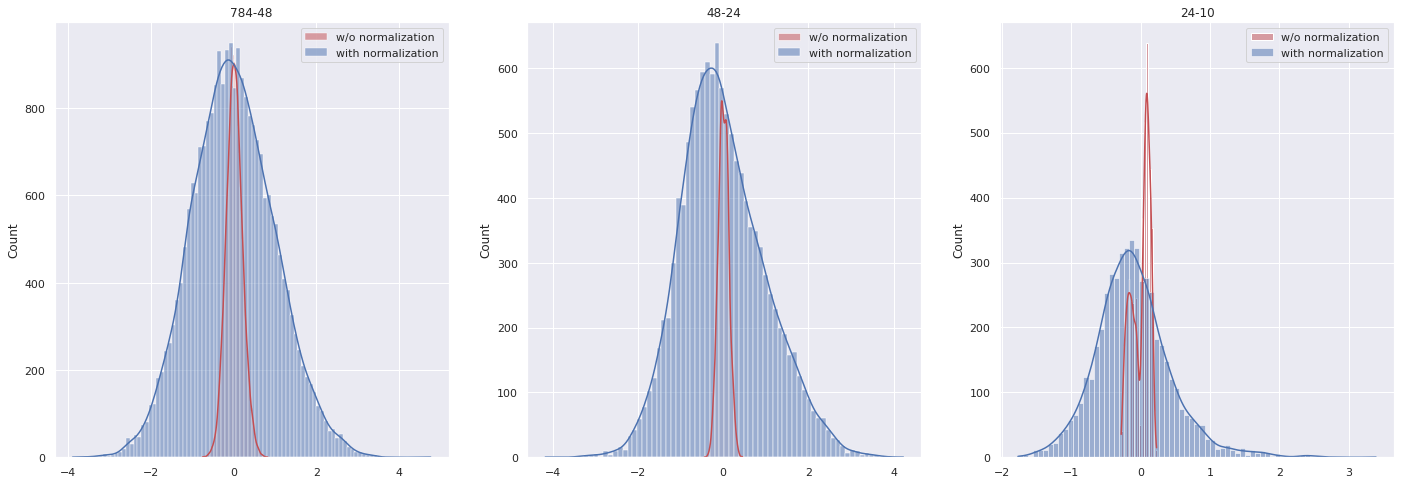

80 batches        W/o Normalization:  2.3181192874908447         Normalization:  1.6038554906845093


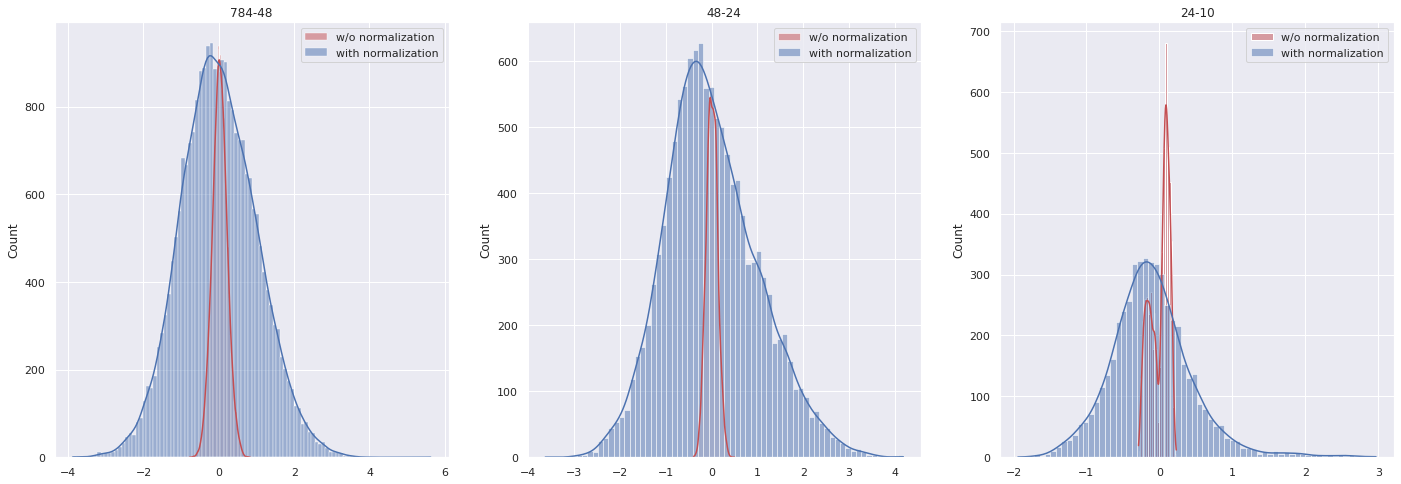

90 batches        W/o Normalization:  2.3026816844940186         Normalization:  1.5858819484710693


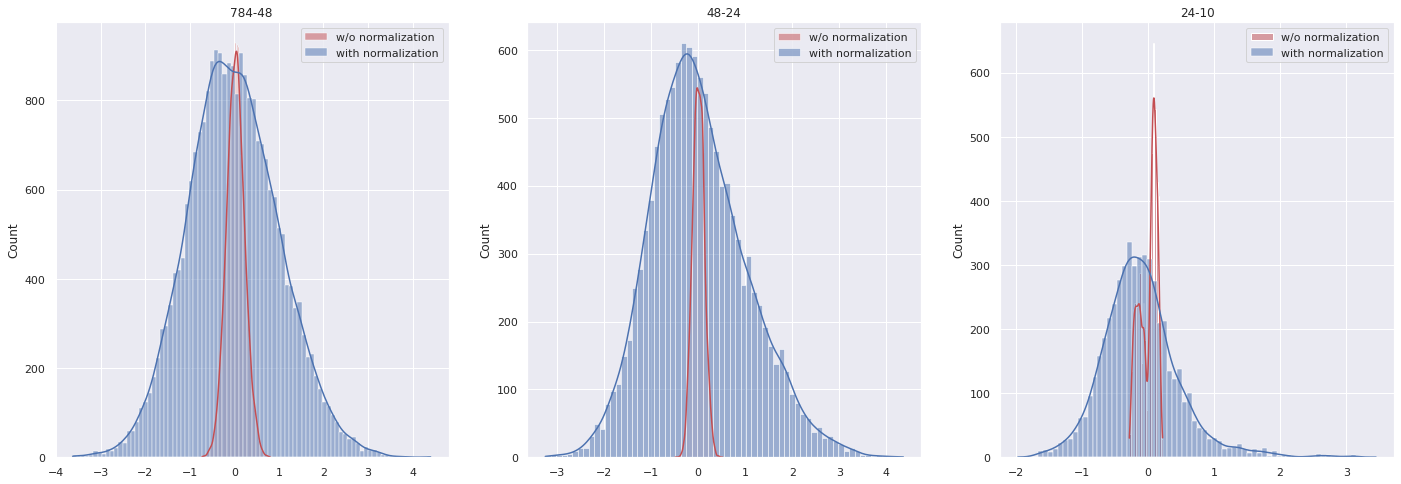

100 batches        W/o Normalization:  2.307365894317627         Normalization:  1.6036319732666016


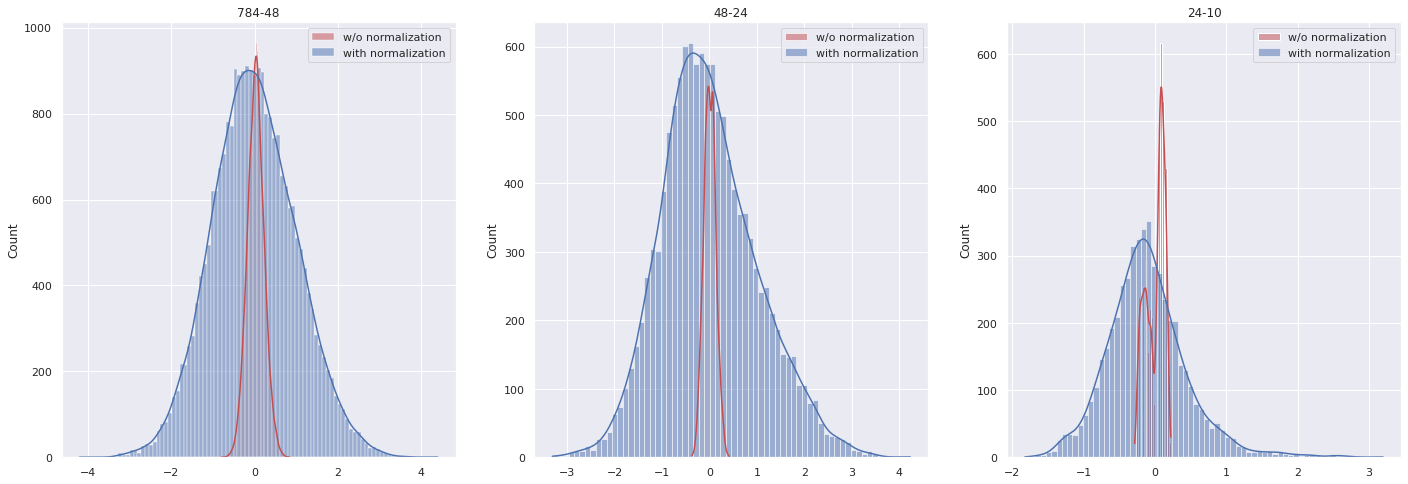

110 batches        W/o Normalization:  2.2961854934692383         Normalization:  1.602510929107666


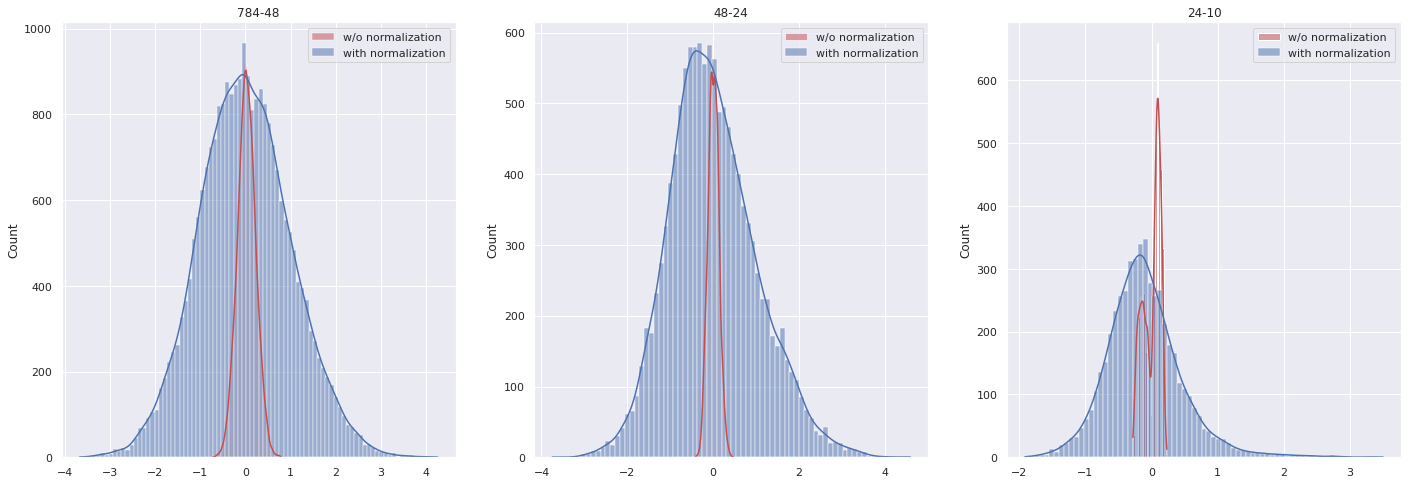

Epoch: 5
10 batches        W/o Normalization:  2.301975727081299         Normalization:  1.5999975204467773


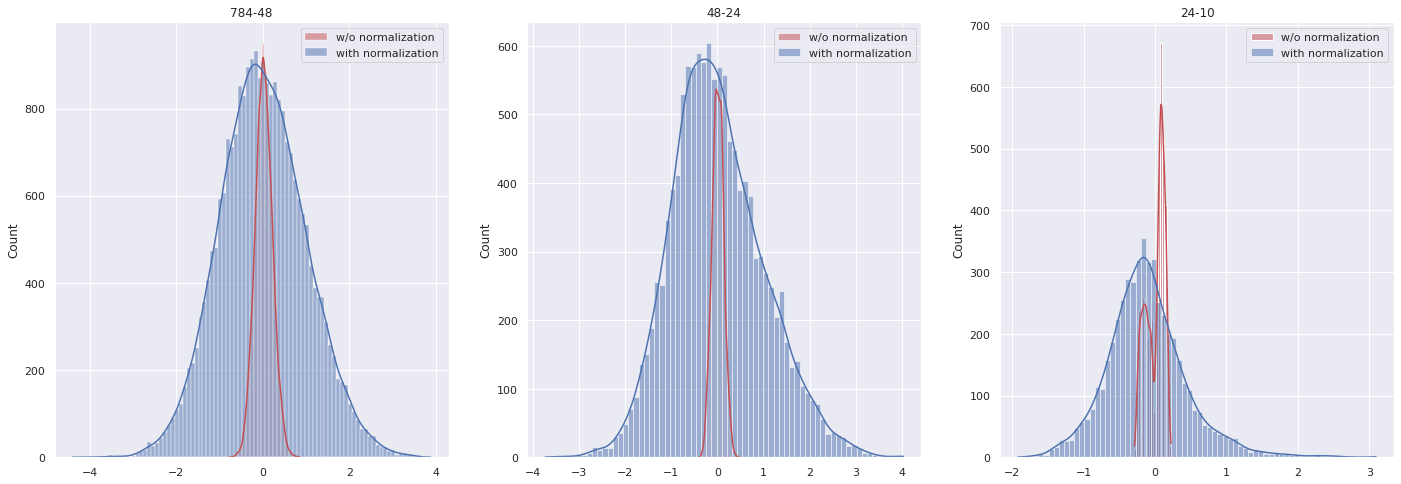

20 batches        W/o Normalization:  2.305460214614868         Normalization:  1.5990077257156372


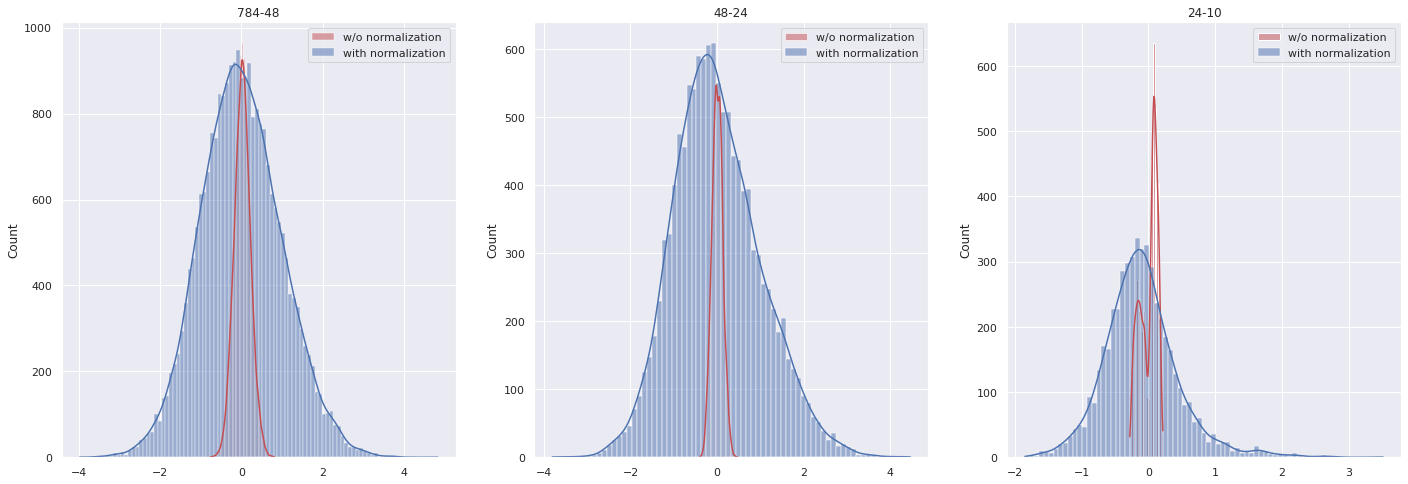

30 batches        W/o Normalization:  2.296633243560791         Normalization:  1.5588082075119019


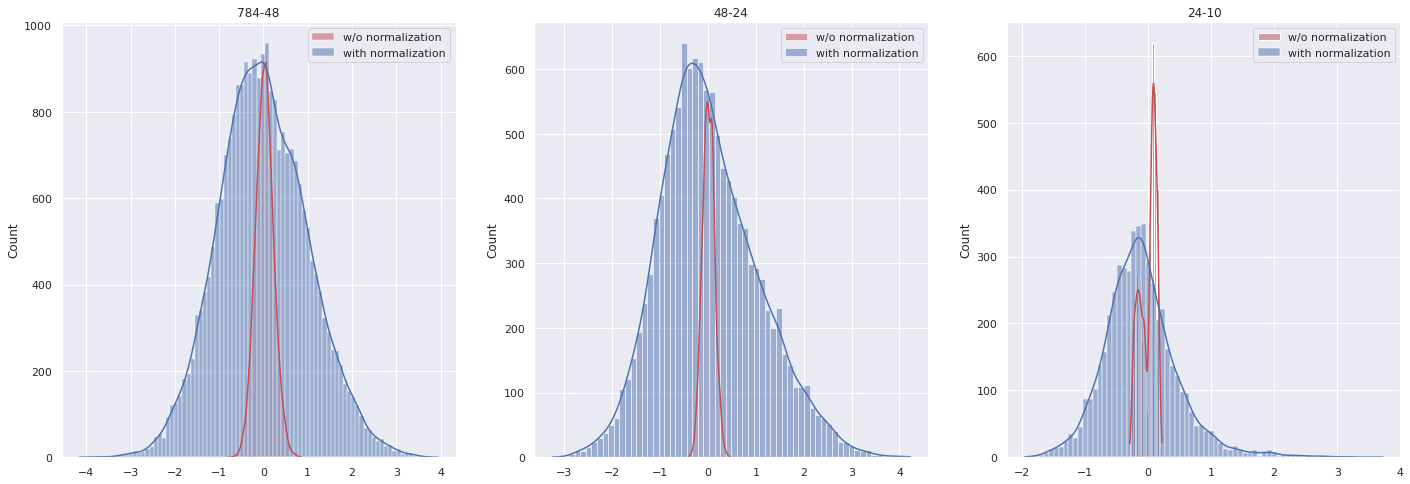

40 batches        W/o Normalization:  2.310141086578369         Normalization:  1.5480225086212158


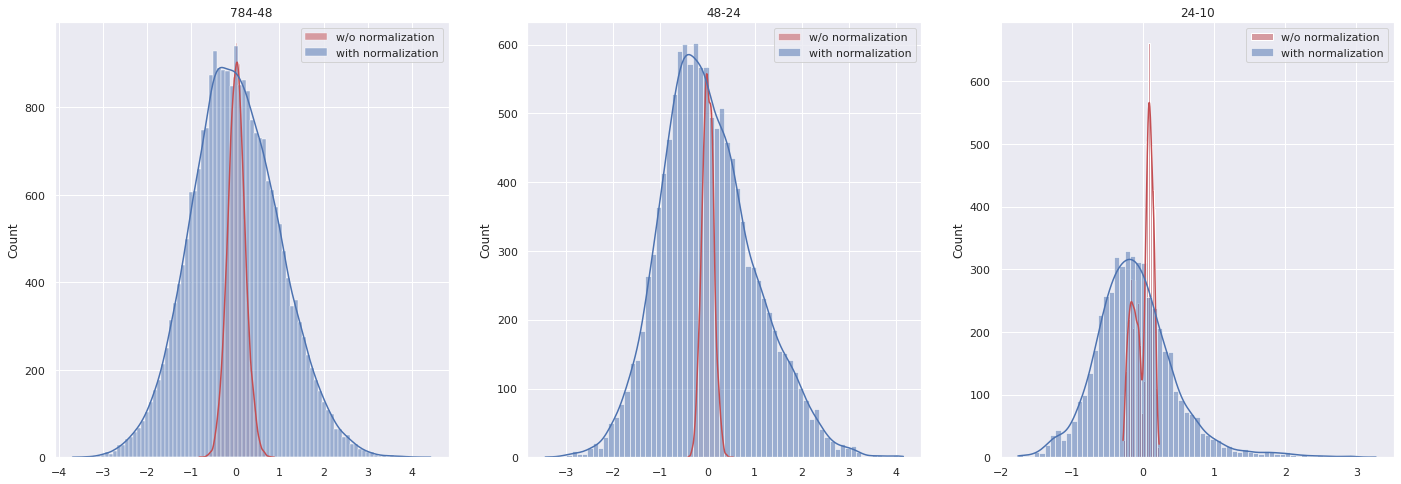

50 batches        W/o Normalization:  2.310750722885132         Normalization:  1.5661150217056274


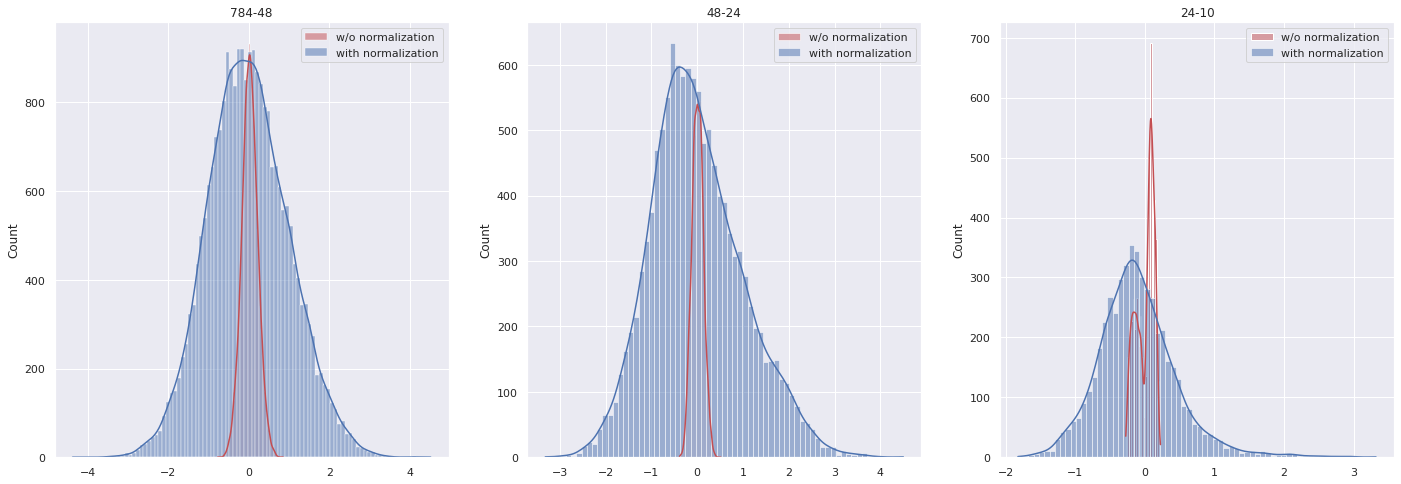

60 batches        W/o Normalization:  2.3053414821624756         Normalization:  1.50644850730896


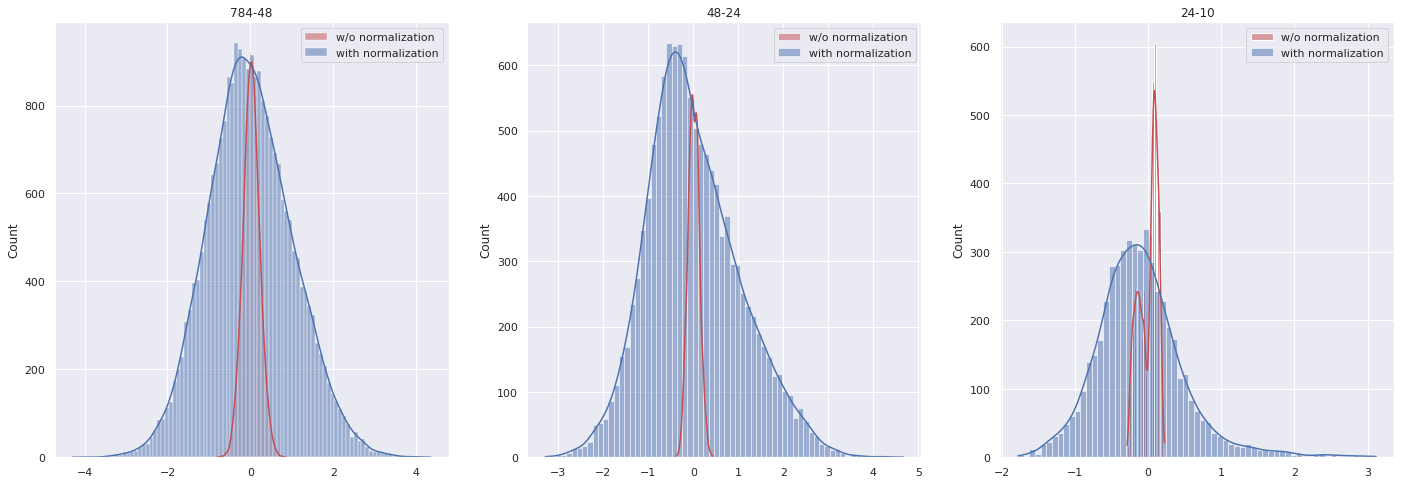

70 batches        W/o Normalization:  2.306089401245117         Normalization:  1.578819751739502


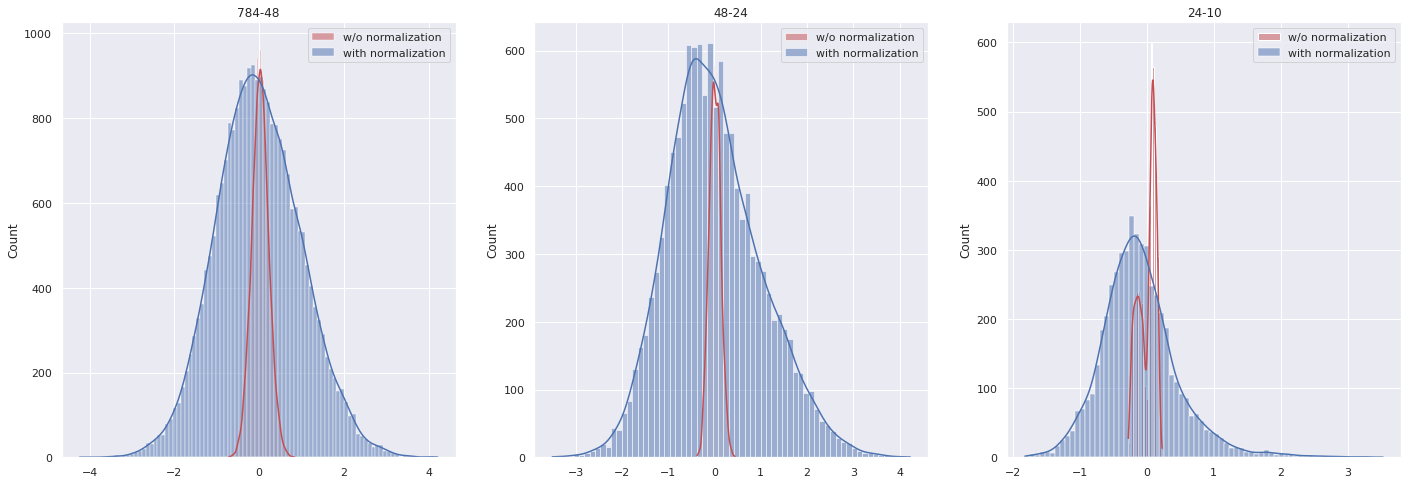

80 batches        W/o Normalization:  2.3016910552978516         Normalization:  1.5159319639205933


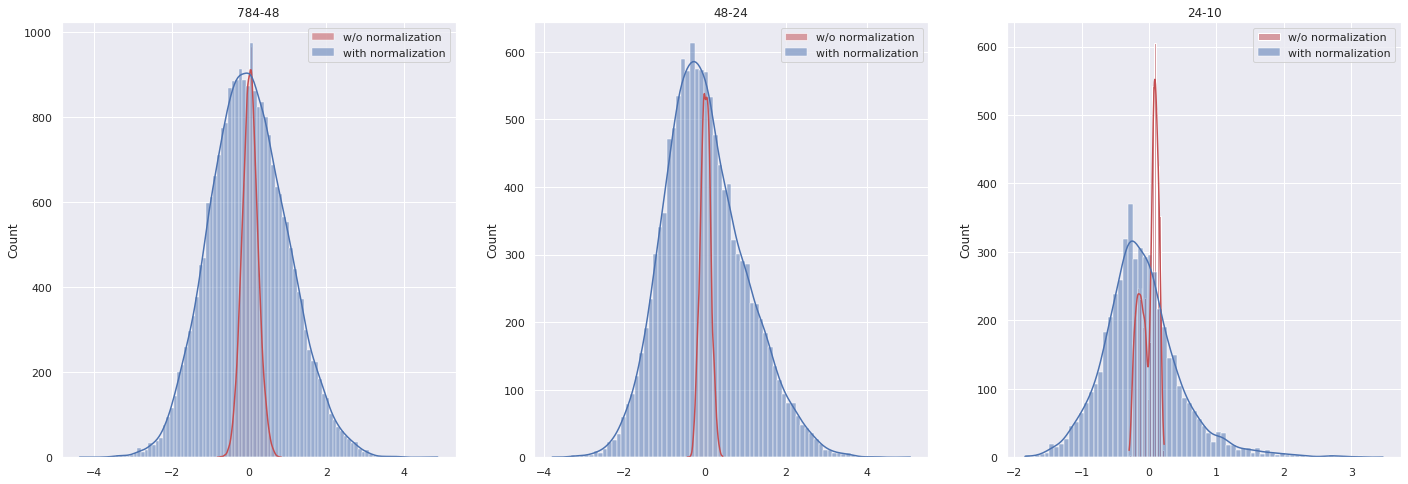

90 batches        W/o Normalization:  2.297933340072632         Normalization:  1.517075777053833


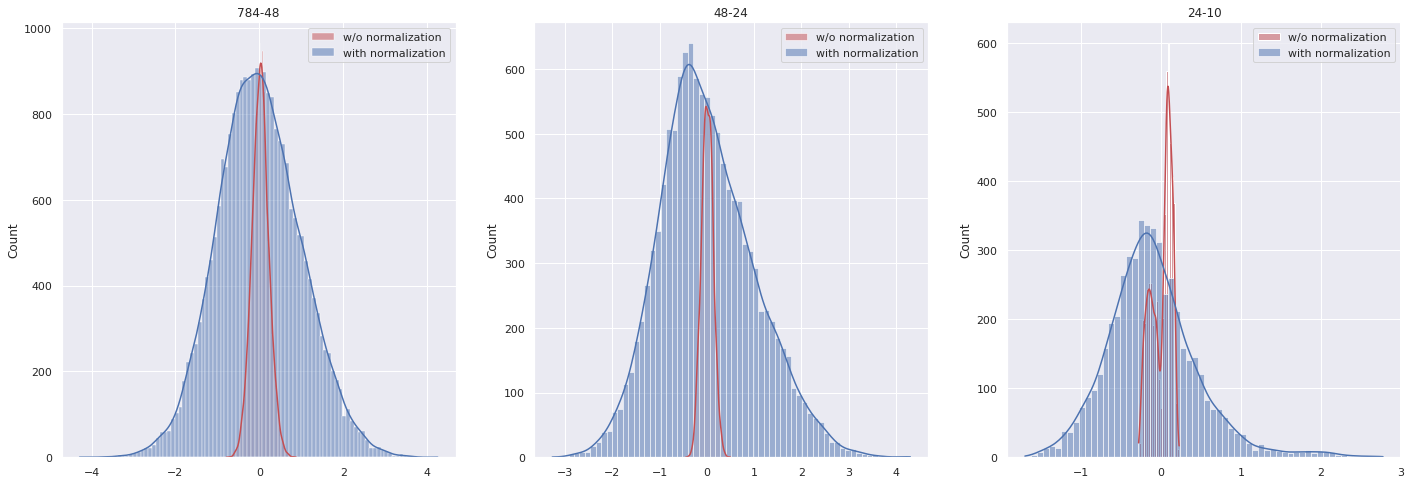

100 batches        W/o Normalization:  2.2947394847869873         Normalization:  1.5148921012878418


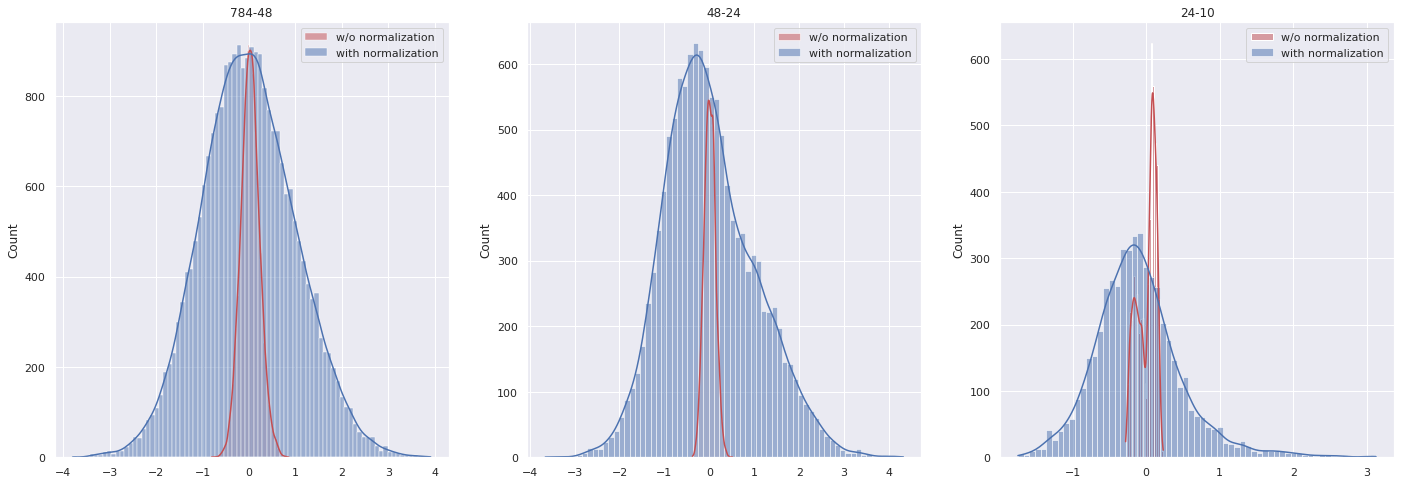

110 batches        W/o Normalization:  2.3005435466766357         Normalization:  1.4912830591201782


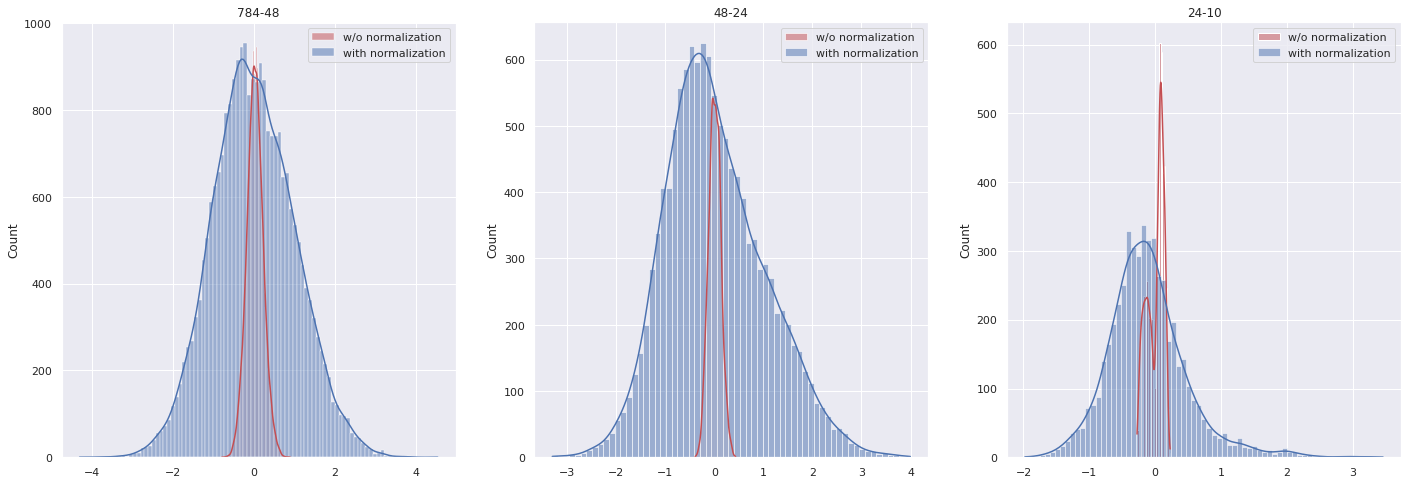

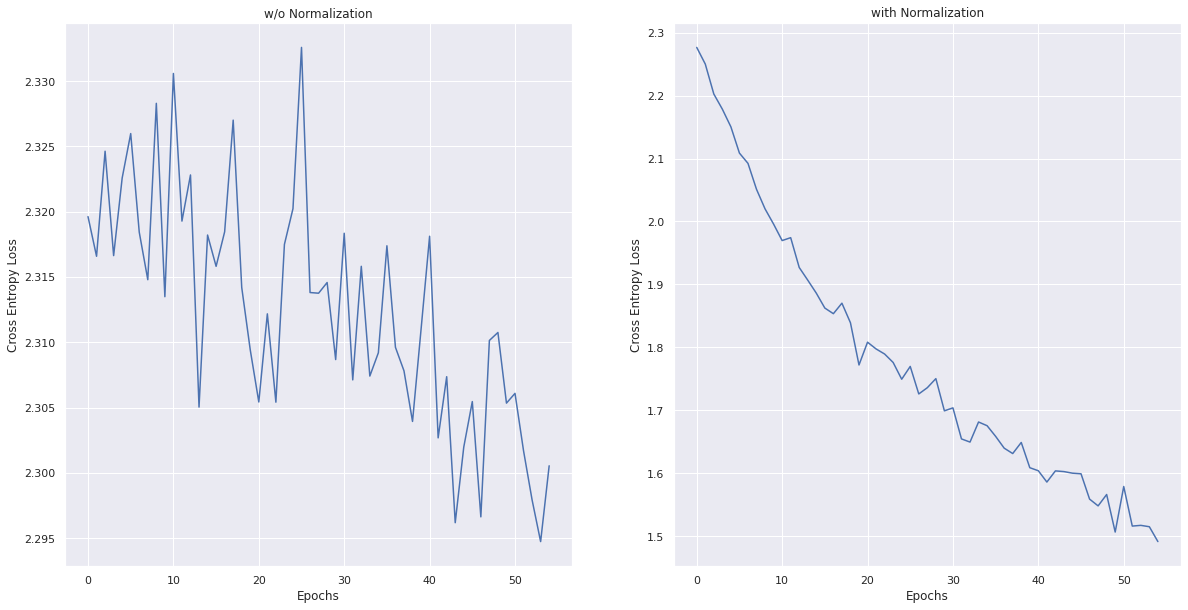

In [ ]:
loss = []
loss_bn = []
epochs = 5
min_loss = 1000
min_loss_bn = 1000

for j in tqdm_notebook(range(epochs)): 
  k = 0
  print('Epoch:', j+1)
  for i, data in enumerate(trainloader2,0):
    k += 1

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    opt_bn.zero_grad()

    output = network(inputs)
    output_bn = network_bn(inputs)

    loss_train = loss_func(output,labels)
    loss_train_bn = loss_func(output_bn,labels)
    loss_train.backward()
    loss_train_bn.backward()

    opt.step()
    opt_bn.step()

    network.train()
    network_bn.train()

    if k%10 == 0:
      print(k,'batches','      ','W/o Normalization: ',loss_train.item(),'       ','Normalization: ',loss_train_bn.item())
      loss.append(loss_train.item()) 
      loss_bn.append(loss_train_bn.item())
      network.eval()
      network_bn.eval()
      output_layer0 = network.feedf[0](inputs.view(inputs.shape[0],-1))
      output_layer0_bn = network_bn.feedf[0](inputs.view(inputs.shape[0],-1))

      output_layer1 = network.feedf[1](output_layer0)
      output_layer1_bn = network_bn.feedf[1](output_layer0_bn)

      output_layer2 = network.feedf[2](output_layer1)
      output_layer2_bn = network_bn.feedf[2](output_layer1_bn)

      output_layer3 = network.feedf[3](output_layer2)
      output_layer3_bn = network_bn.feedf[3](output_layer2_bn)


      output_layer4 = network.feedf[4](output_layer3)
      output_layer4_bn = network_bn.feedf[4](output_layer3_bn)

      output_layer5_bn = network_bn.feedf[5](output_layer4_bn)
      output_layer6_bn = network_bn.feedf[6](output_layer5_bn)  

      fig, ax = plt.subplots(1,3,figsize = (24,8))

      plt.subplot(1,3,1)
      sns.histplot(torch.flatten(output_layer0).detach().cpu().numpy(),kde=True,color='r',label=('w/o normalization'))
      sns.histplot(torch.flatten(output_layer1_bn).detach().cpu().numpy(),kde=True,color='b',label=('with normalization'))
      plt.title('784-48')
      plt.legend()

      plt.subplot(1,3,2)
      sns.histplot(torch.flatten(output_layer2).detach().cpu().numpy(),kde=True,color='r',label=('w/o normalization'))
      sns.histplot(torch.flatten(output_layer4_bn).detach().cpu().numpy(),kde=True,color='b',label=('with normalization'))
      plt.title('48-24')
      plt.legend()

      plt.subplot(1,3,3)
      sns.histplot(torch.flatten(output_layer4).detach().cpu().numpy(),kde=True,color='r',label=('w/o normalization'))
      sns.histplot(torch.flatten(output_layer6_bn).detach().cpu().numpy(),kde=True,color='b',label=('with normalization'))
      plt.title('24-10')
      plt.legend()

      plt.show()
      network.train()
      network_bn.train()

    del inputs, labels, output, output_bn
    torch.cuda.empty_cache()

fig, ax = plt.subplots(1,2, figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('w/o Normalization')

plt.subplot(1,2,2)
plt.plot(loss_bn)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('with Normalization')

plt.show()

#This code block trains both the networks simultaneously and compares the outputs of similar layers of the two networks
#Each network has 3 linear layers: 784-48, 48-24 and 24-10
#We train the two networks as usual, forward passing, loss calculation, backpropagation and optimization separately for each
#As soon as training for 10 batches is complete, the models are sent into evaluation mode, the outputs of each layer of both networks are recorded for the inputs
#Then the output of the 3 linear layers of both the networks are plotted simulatneously, with blue depicting the batchnormalized networks
#The models are sent back to training mode and this is repeated until the training process is complete

## RESULTS:
#It is clear from the plots that the batchnormalized data plotted is definetely more stable, the mean remains centered at zero and the standard deviation is 1
#The first layers for both the networks are the same, therefore the plots initially for layer one are quite similar
#The training loss curve at the end shows that training is a lot more stable for batchnormalization since the model is able to learn better

## Dropout



In [ ]:
N = 100

X_train = torch.linspace(-1,1,N)
Y_train = X_train + 0.3*((torch.rand(100)*2)-1)

X_test = torch.linspace(-1,1,N)
Y_test = X_test + 0.3*((torch.rand(100)*2)-1)

#Generating toy data with some noise for training on a network 

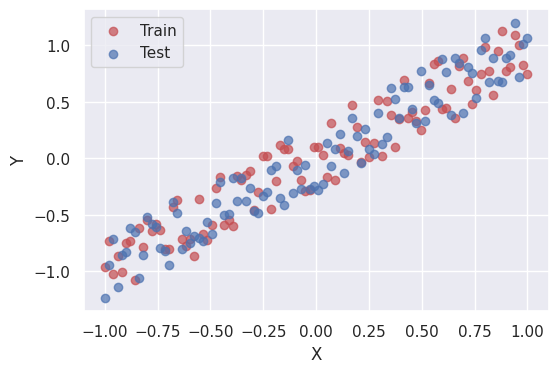

In [ ]:
plt.figure(dpi=100)
plt.scatter(X_train.numpy(),Y_train.numpy(),c='r',alpha=0.7,label = 'Train')
plt.scatter(X_test.numpy(),Y_test.numpy(),c='b',alpha=0.7,label = 'Test')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Plotting the training and the test data

In [ ]:
model = nn.Sequential(
    nn.Linear(1,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,1)
)


model_dp = nn.Sequential(
    nn.Linear(1,100),
    nn.Dropout(0.6),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.Dropout(0.6),
    nn.ReLU(),
    nn.Linear(100,1)
)

#Here we create two networks, one with 3 linear layers and the ReLU activation and the other having two additional dropout layers

In [ ]:
model = model.to(device)
model_dp = model_dp.to(device)
loss_func = nn.MSELoss()
opt = optim.Adam(model.parameters(),lr = 0.005)
opt_dp = optim.Adam(model_dp.parameters(),lr = 0.005)

#Instantiating both networks, setting a loss criterion and optimizers

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)


0 epochs   Training Loss, w/o dropout: 0.36788299679756165      with dropout: 0.5311403274536133
torch.Size([100, 1])


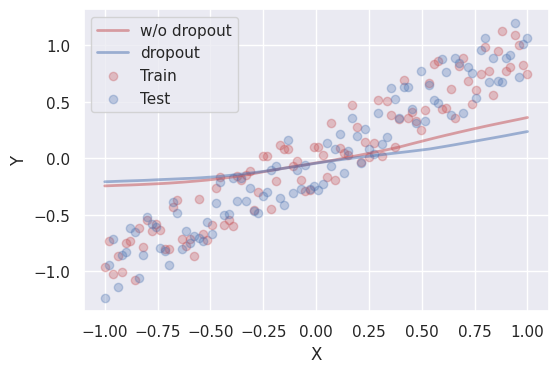

500 epochs   Training Loss, w/o dropout: 0.02955547720193863      with dropout: 0.04980635643005371
torch.Size([100, 1])


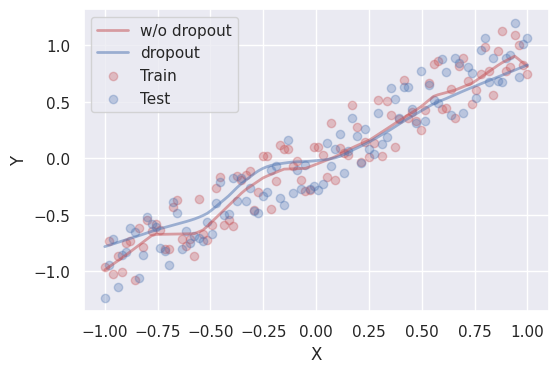

1000 epochs   Training Loss, w/o dropout: 0.027301950380206108      with dropout: 0.05409815162420273
torch.Size([100, 1])


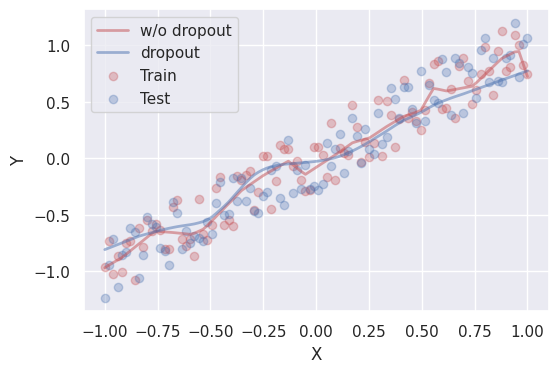

1500 epochs   Training Loss, w/o dropout: 0.026325345039367676      with dropout: 0.048870209604501724
torch.Size([100, 1])


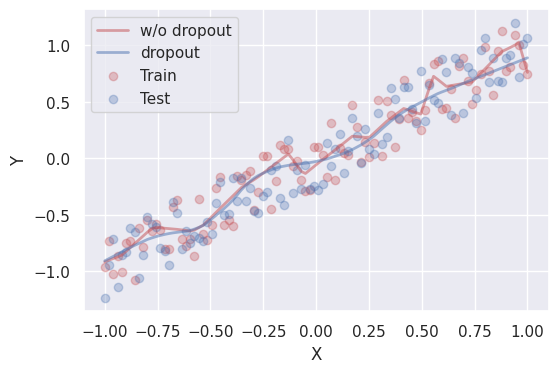

2000 epochs   Training Loss, w/o dropout: 0.024982623755931854      with dropout: 0.0511348620057106
torch.Size([100, 1])


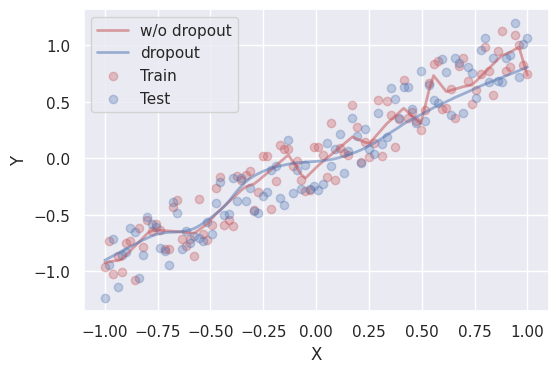

2500 epochs   Training Loss, w/o dropout: 0.025160156190395355      with dropout: 0.043987635523080826
torch.Size([100, 1])


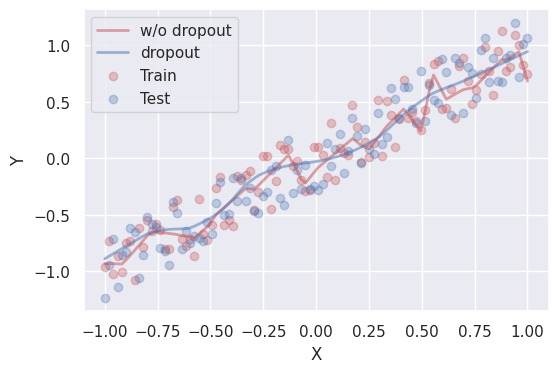

3000 epochs   Training Loss, w/o dropout: 0.02355426736176014      with dropout: 0.04890837520360947
torch.Size([100, 1])


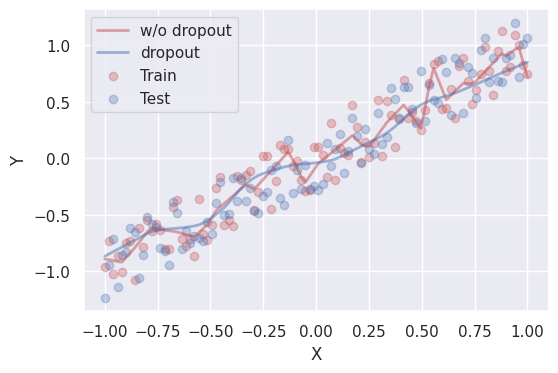

3500 epochs   Training Loss, w/o dropout: 0.023432273417711258      with dropout: 0.04616487771272659
torch.Size([100, 1])


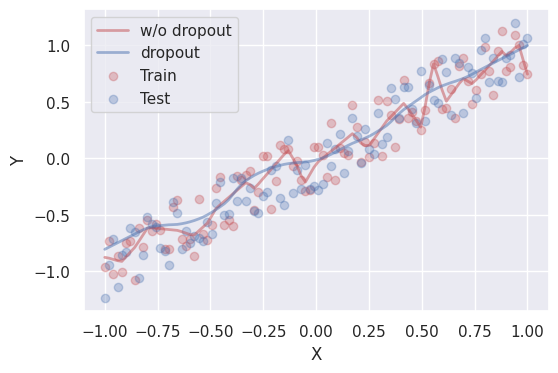

4000 epochs   Training Loss, w/o dropout: 0.022202840074896812      with dropout: 0.04598796367645264
torch.Size([100, 1])


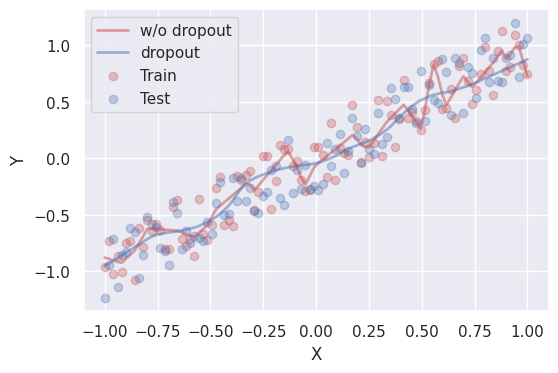

4500 epochs   Training Loss, w/o dropout: 0.02167004719376564      with dropout: 0.04343964532017708
torch.Size([100, 1])


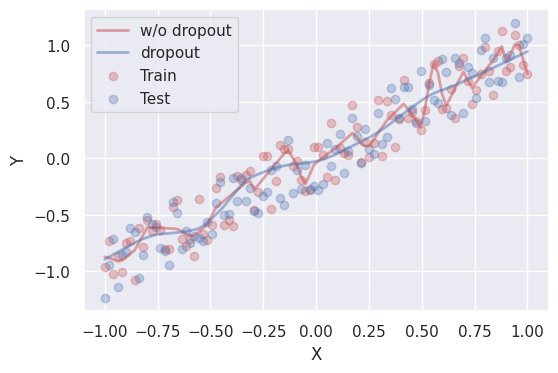

5000 epochs   Training Loss, w/o dropout: 0.02092706225812435      with dropout: 0.052756812423467636
torch.Size([100, 1])


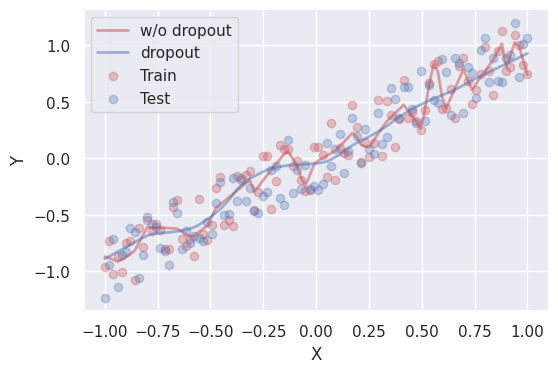

5500 epochs   Training Loss, w/o dropout: 0.021653348580002785      with dropout: 0.0522344671189785
torch.Size([100, 1])


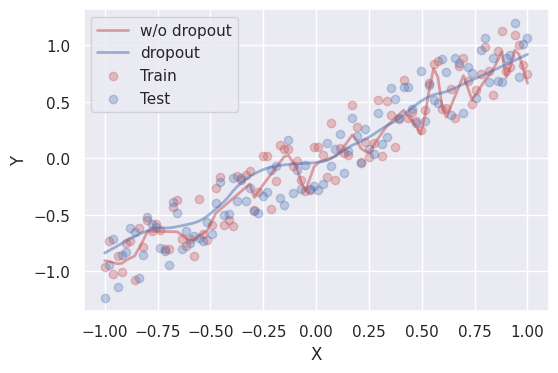

6000 epochs   Training Loss, w/o dropout: 0.019847804680466652      with dropout: 0.04615316167473793
torch.Size([100, 1])


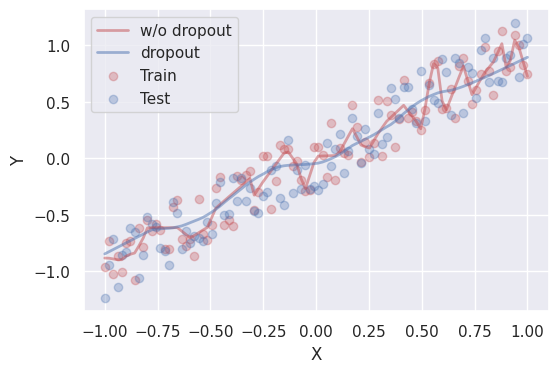

6500 epochs   Training Loss, w/o dropout: 0.0200444757938385      with dropout: 0.04966030642390251
torch.Size([100, 1])


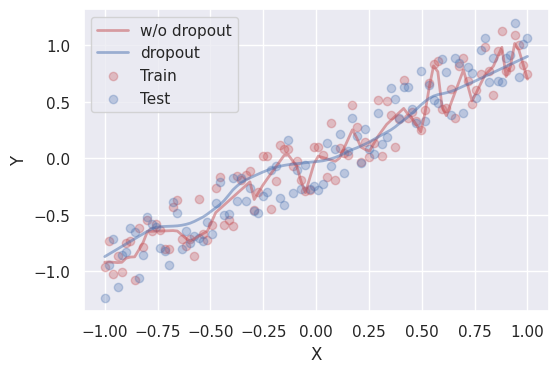

7000 epochs   Training Loss, w/o dropout: 0.01916760392487049      with dropout: 0.04708271473646164
torch.Size([100, 1])


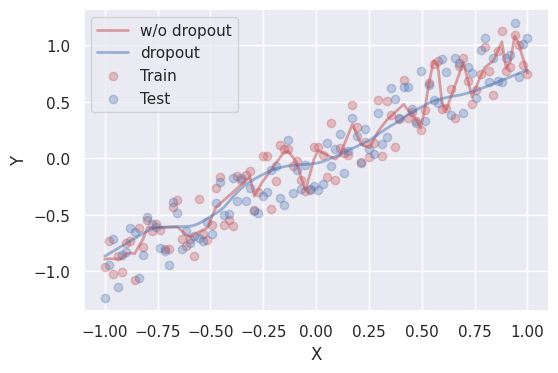

7500 epochs   Training Loss, w/o dropout: 0.018635354936122894      with dropout: 0.04264745116233826
torch.Size([100, 1])


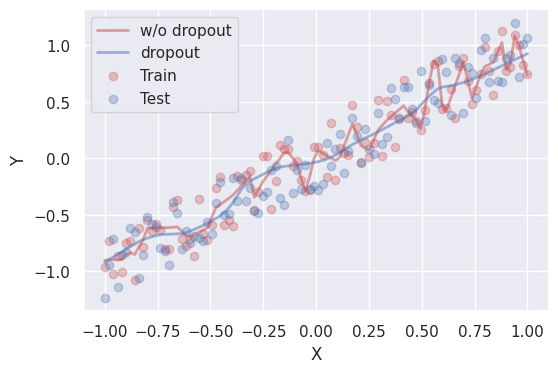

8000 epochs   Training Loss, w/o dropout: 0.01841769367456436      with dropout: 0.04183991253376007
torch.Size([100, 1])


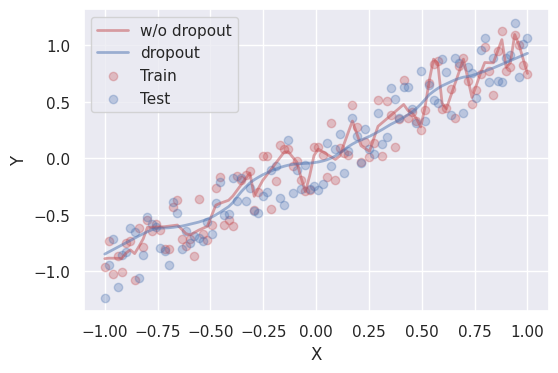

8500 epochs   Training Loss, w/o dropout: 0.01691705733537674      with dropout: 0.039247240871191025
torch.Size([100, 1])


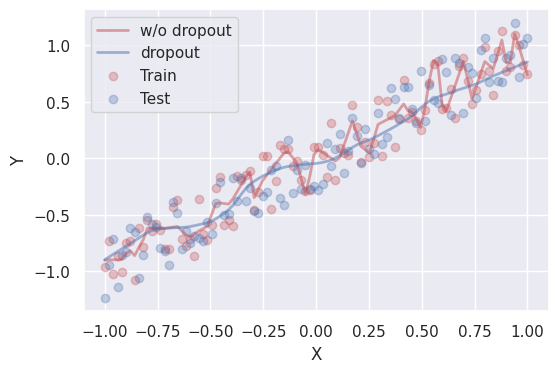

9000 epochs   Training Loss, w/o dropout: 0.01777644082903862      with dropout: 0.05470921844244003
torch.Size([100, 1])


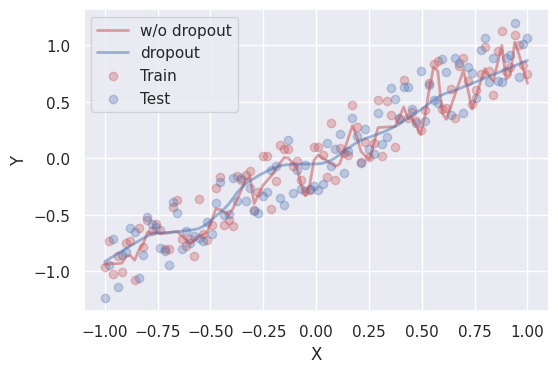

9500 epochs   Training Loss, w/o dropout: 0.01573774963617325      with dropout: 0.04828117415308952
torch.Size([100, 1])


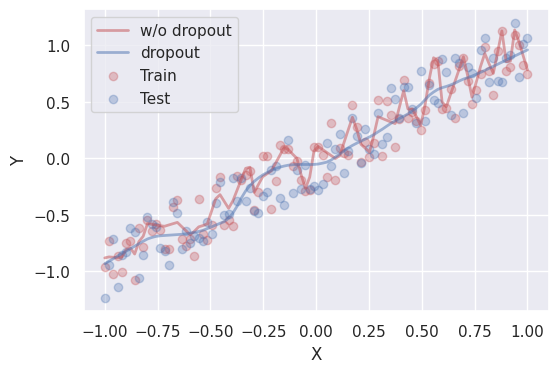

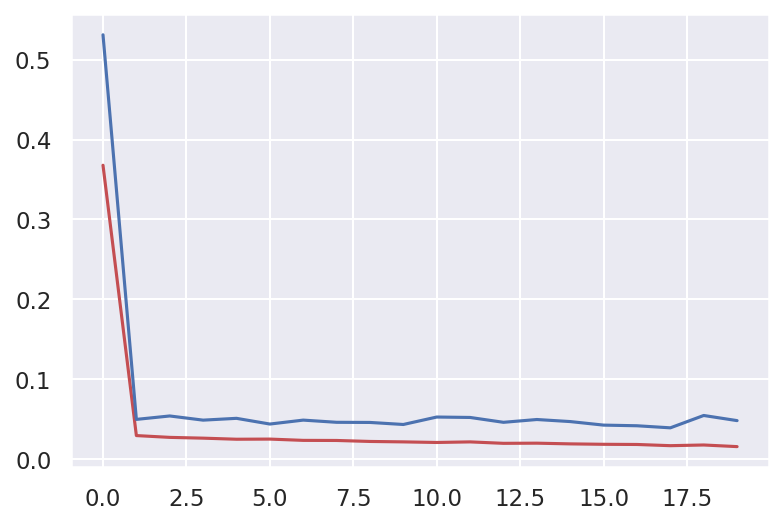

In [ ]:
epochs = 10000
loss = []
loss_dp = []
Y_train = Y_train.to(device)

for i in range(epochs):
  inputs = X_train.to(device)

  opt.zero_grad()
  opt_dp.zero_grad()

  output = model(X_train.reshape(-1,1).to(device))
  output_dp = model_dp(X_train.reshape(-1,1).to(device))

  loss_train = loss_func(output.flatten(),Y_train)
  loss_train_dp = loss_func(output_dp.flatten(),Y_train)

  loss_train.backward()
  loss_train_dp.backward()

  opt.step()
  opt_dp.step()

  if (i%500) == 0:
    print(i,'epochs  ', 'Training Loss, w/o dropout:',loss_train.item(), '     with dropout:', loss_train_dp.item())
    loss.append(loss_train.item())
    loss_dp.append(loss_train_dp.item())
    model.eval()
    model_dp.eval()
    test_output = model(X_test.reshape(-1,1).to(device))
    test_output_dp = model_dp(X_test.reshape(-1,1).to(device))
    print(test_output.shape)
    plt.figure(dpi=100)
    plt.plot(X_test.cpu().numpy(),test_output.detach().cpu().numpy(),'r',alpha=0.5,linewidth=2, label = 'w/o dropout')
    plt.plot(X_test.cpu().numpy(),test_output_dp.detach().cpu().numpy(),'b',alpha=0.5,linewidth=2, label= 'dropout')
    plt.scatter(X_train.cpu().numpy(),Y_train.cpu().numpy(),c='r',alpha=0.3,label = 'Train')
    plt.scatter(X_test.cpu().numpy(),Y_test.cpu().numpy(),c='b',alpha=0.3,label = 'Test')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    model.train()
    model_dp.train()

  del output, output_dp
  torch.cuda.empty_cache()


plt.figure(dpi=150)
plt.plot(loss, 'r')
plt.plot(loss_dp,'b')
plt.show()


#Since our dataset is small, we run a training loop for 10,000 epochs
#The process is the same as always, forward pass with loss computing, backpropagation and optimization
#Every 500 epochs, the model is sent into evaluation mode and the following plots are made
#1. Plotting the training and the test datapoints
#2. Plotting both models prediction on the test data, with the blue line for dropout

#RESULTS:
#We need our model to be able to learn something close to a straight line
#Initially both networks are untrained and so both lines coincide
#As training progresses the shape of the lines begin to match that of the  data
#The network without dropout begins to overfit, i.e. the red line becomes crooked to try to touch each individual point. 
#This is a deviation from what the network should acheive and is known as overfitting
#The blue line however is kept stable by the help of dropout and allows for some loss to hold
#This result is depicted in the final loss plots as well. The red reaches a low loss but it is due to overfitting 


torch.Size([100, 1])


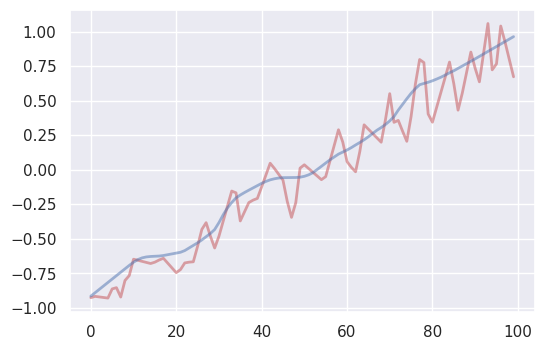

In [ ]:
model.eval()
model_dp.eval()
test_output = model(X_test.reshape(-1,1).to(device))
test_output_dp = model_dp(X_test.reshape(-1,1).to(device))
print(test_output.shape)
plt.figure(dpi=100)
plt.plot(test_output.detach().cpu().numpy(),'r',alpha=0.5,linewidth=2)
plt.plot(test_output_dp.detach().cpu().numpy(),'b',alpha=0.5,linewidth=2)

#We can also see the final state of the networks, the regular network has overfit on the data

###Batchnorm 2d on our own CNN

In [3]:
class CNN_bn(nn.Module):

  def __init__(self):
    super(CNN_bn,self).__init__()  #Check this 
    self.conv1 = nn.Sequential(
        nn.Conv2d(1,3,5),   #(N,1,28,28) -> (N,3,24,24)
        nn.ReLU(),  #(N,3,24,24) --> (N,3,24,24)
        nn.AvgPool2d(2,stride=2),  #(N,3,24,24) -> (N,3,12,12)
        nn.Conv2d(3,6,3),  #(N,3,12,12) -> (N,6,10,10)
        nn.BatchNorm2d(6)
    )

    self.conv2 = nn.Sequential(
        nn.ReLU(), 
        nn.AvgPool2d(2,stride=2) #(N,6,10,10) --> (N,6,5,5)
    )  
    self.feedf = nn.Sequential(
        nn.Linear(150,25),
        nn.ReLU(),
        nn.Linear(25,10),
    )
    
  
  def forward(self,x):
    x1 = self.conv1(x)
    x2 = self.conv2(x1)
    x3 = x2.view(x2.shape[0],-1)
    x4 = self.feedf(x3)
    return x4



class CNN_no_bn(nn.Module):

  def __init__(self):
    super(CNN_no_bn,self).__init__()  #Check this 
    self.conv1 = nn.Sequential(
        nn.Conv2d(1,3,5),   #(N,1,28,28) -> (N,3,24,24)
        nn.ReLU(),  #(N,3,24,24) --> (N,3,24,24)
        nn.AvgPool2d(2,stride=2),  #(N,3,24,24) -> (N,3,12,12)
        nn.Conv2d(3,6,3),  #(N,3,12,12) -> (N,6,10,10)
    )

    self.conv2 = nn.Sequential(
        nn.ReLU(), 
        nn.AvgPool2d(2,stride=2) #(N,6,10,10) --> (N,6,5,5)
    )  
    self.feedf = nn.Sequential(
        nn.Linear(150,25),
        nn.ReLU(),
        nn.Linear(25,10),
    )
    
  
  def forward(self,x):
    x1 = self.conv1(x)
    x2 = self.conv2(x1)
    x3 = x2.view(x2.shape[0],-1)
    x4 = self.feedf(x3)
    return x4


#We want to see the performance of two convolutional networks, one with and without batch normalization 
#There are 3 sequentials, 2 having convolutional layers and one with a fully connected layer
#We will train them on the MNIST dataset

In [4]:
conv_bn = CNN_bn()
print(conv_bn)
conv_no_bn = CNN_no_bn()
print(conv_no_bn)

CNN_bn(
  (conv1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (feedf): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)
CNN_no_bn(
  (conv1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv2): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (feedf): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2)

In [5]:
trainloader2 = torch.utils.data.DataLoader(trainset,batch_size=512,shuffle=True)

#Loading our data in batches of 512

In [8]:
conv_bn = conv_bn.to(device)
conv_no_bn = conv_no_bn.to(device)
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(conv_bn.parameters(),lr=0.0005)
opt_no_bn = optim.Adam(conv_no_bn.parameters(), lr =0.0005)

#Setting loss functions and optmizers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Epoch: 1
10 batches        with Normalization:  2.26540207862854        W/o Normalization:  2.3040366172790527


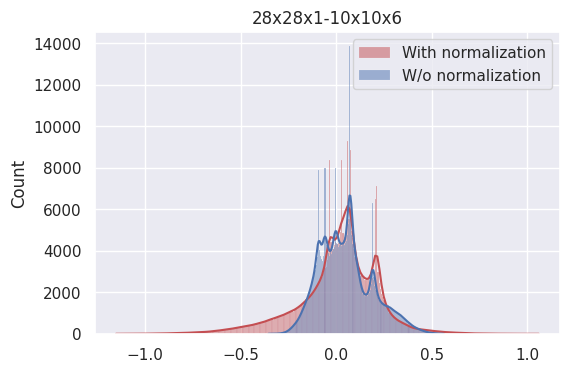

20 batches        with Normalization:  2.1901612281799316        W/o Normalization:  2.294435977935791


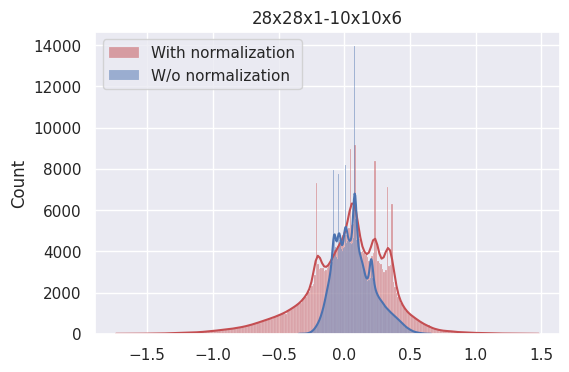

30 batches        with Normalization:  2.120126485824585        W/o Normalization:  2.2815725803375244


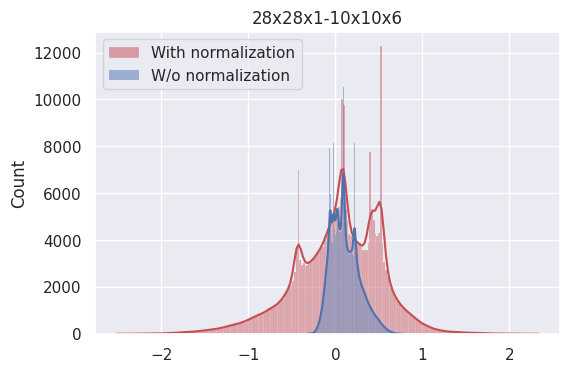

40 batches        with Normalization:  2.0270376205444336        W/o Normalization:  2.256983757019043


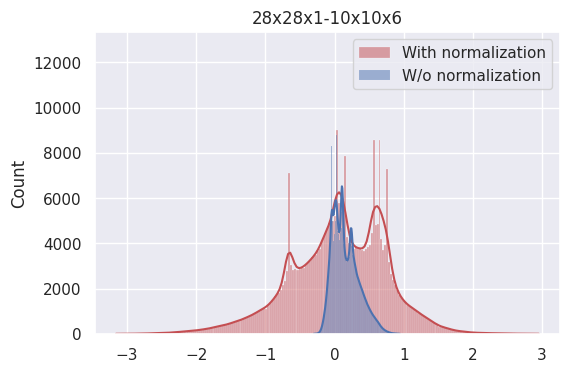

50 batches        with Normalization:  1.919333815574646        W/o Normalization:  2.240518569946289


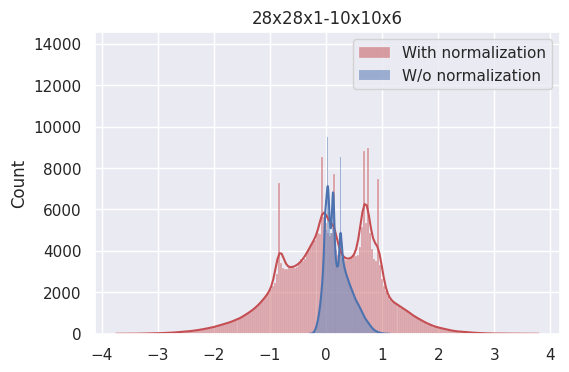

60 batches        with Normalization:  1.7677353620529175        W/o Normalization:  2.1917941570281982


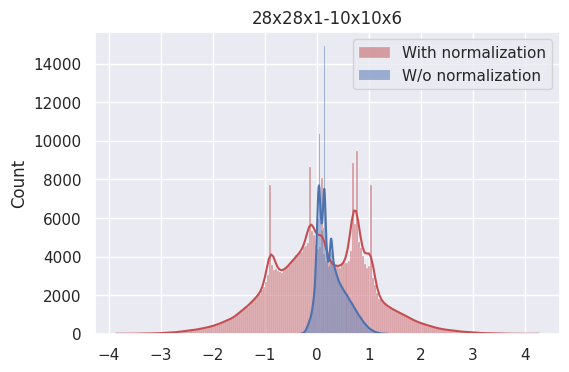

70 batches        with Normalization:  1.6340829133987427        W/o Normalization:  2.131396532058716


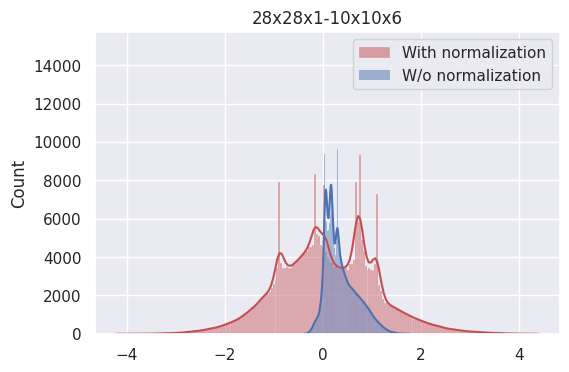

80 batches        with Normalization:  1.5077519416809082        W/o Normalization:  2.037851095199585


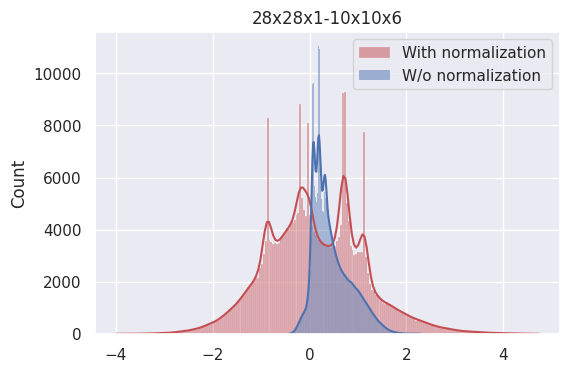

90 batches        with Normalization:  1.3844650983810425        W/o Normalization:  1.9187850952148438


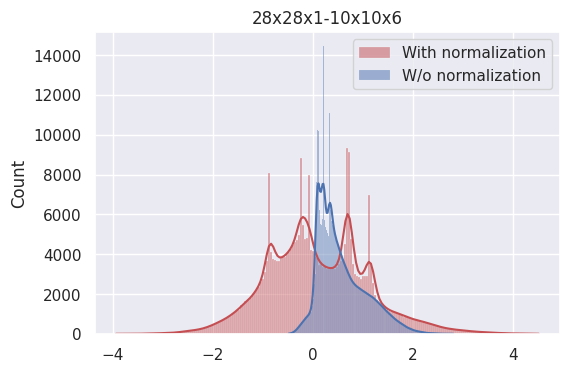

100 batches        with Normalization:  1.2284494638442993        W/o Normalization:  1.755522608757019


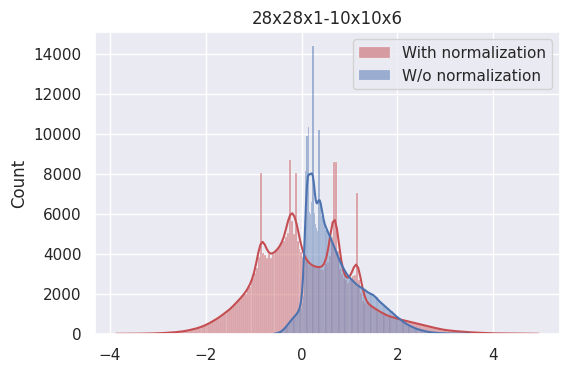

110 batches        with Normalization:  1.111535668373108        W/o Normalization:  1.5778653621673584


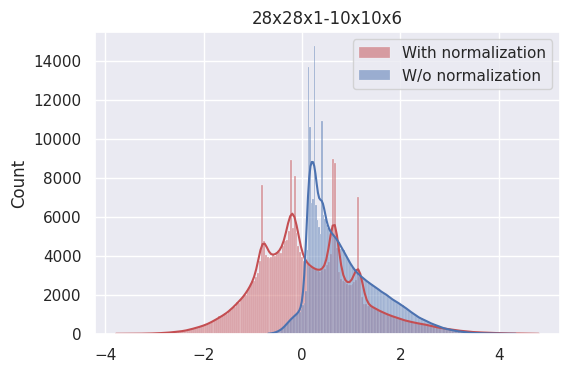

Epoch: 2
10 batches        with Normalization:  0.8900136351585388        W/o Normalization:  1.2509825229644775


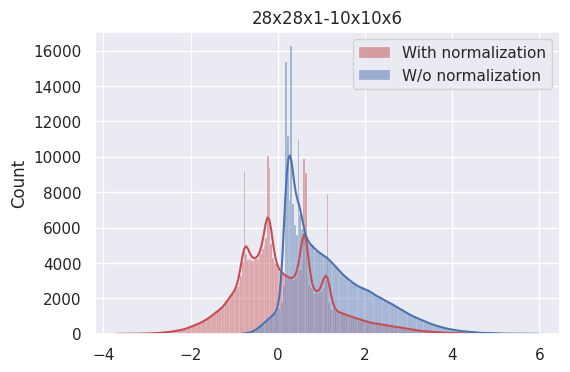

20 batches        with Normalization:  0.851215660572052        W/o Normalization:  1.122029185295105


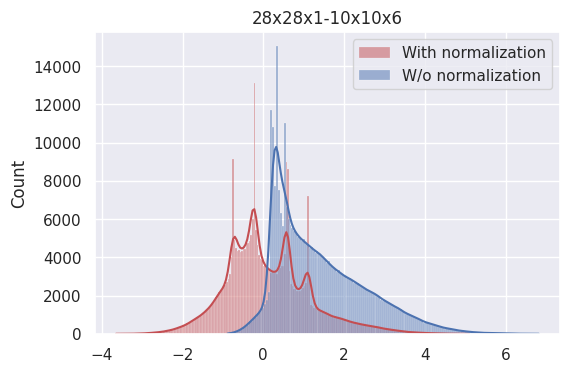

30 batches        with Normalization:  0.7515082955360413        W/o Normalization:  0.9853737950325012


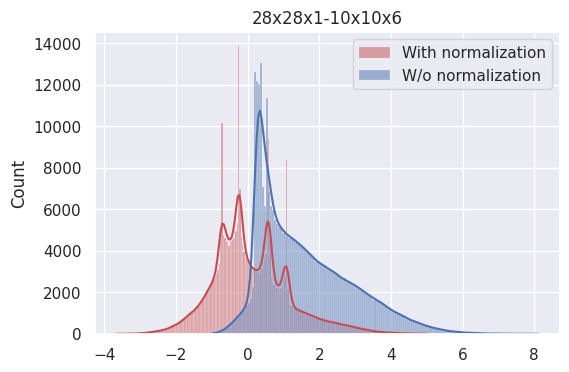

40 batches        with Normalization:  0.6627258658409119        W/o Normalization:  0.8585906624794006


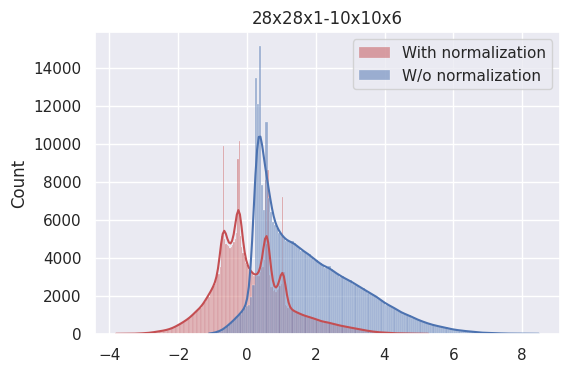

50 batches        with Normalization:  0.6136465072631836        W/o Normalization:  0.7845315933227539


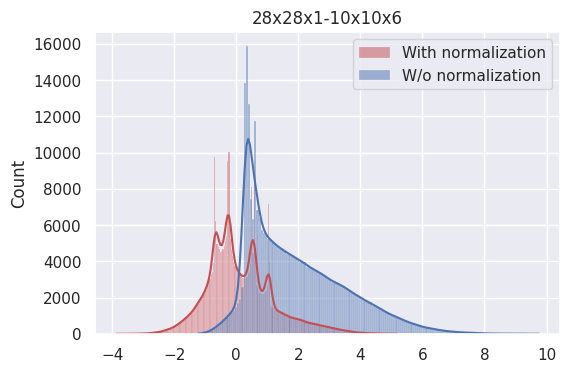

60 batches        with Normalization:  0.5708755850791931        W/o Normalization:  0.7298803925514221


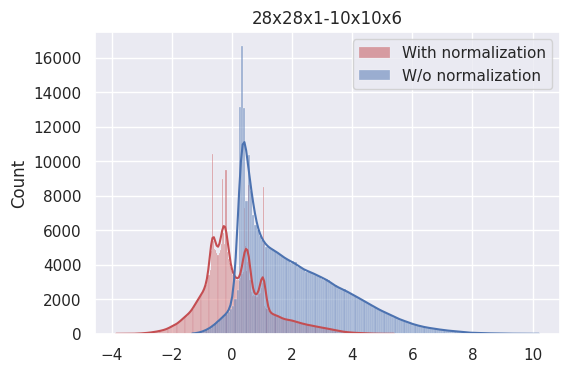

70 batches        with Normalization:  0.487172394990921        W/o Normalization:  0.6751046180725098


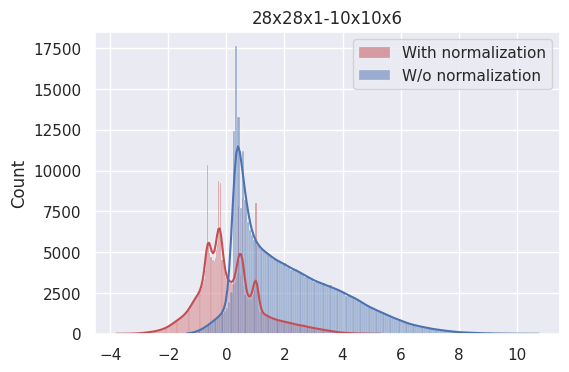

80 batches        with Normalization:  0.5256052613258362        W/o Normalization:  0.7037286162376404


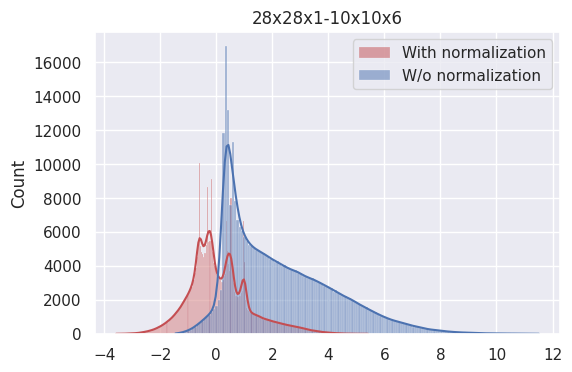

90 batches        with Normalization:  0.4873258173465729        W/o Normalization:  0.6396022439002991


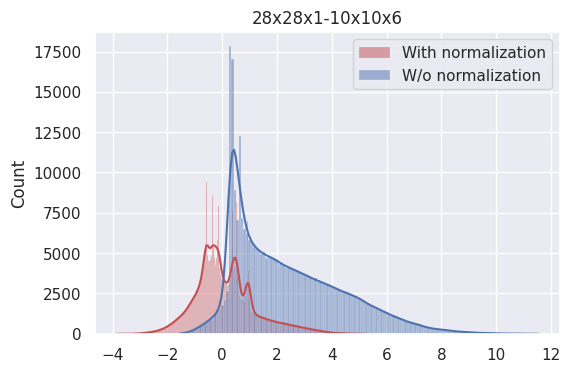

100 batches        with Normalization:  0.42456385493278503        W/o Normalization:  0.601117730140686


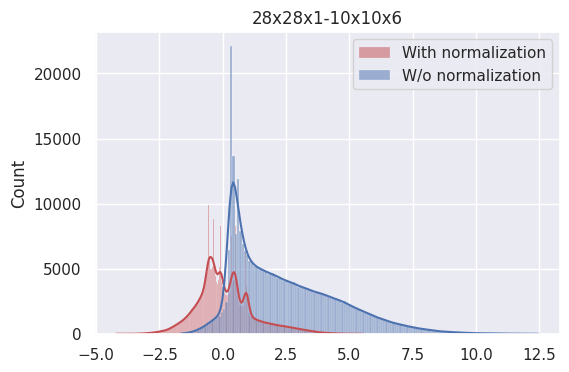

110 batches        with Normalization:  0.41456320881843567        W/o Normalization:  0.5701878070831299


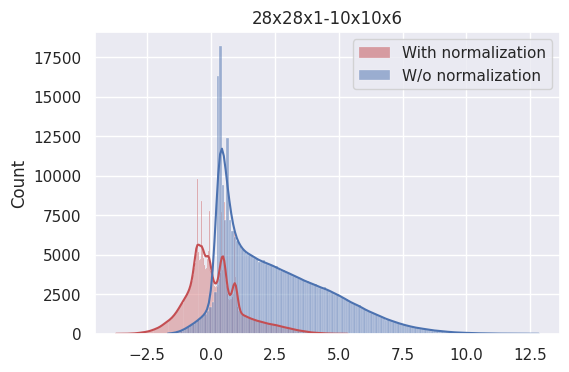

Epoch: 3
10 batches        with Normalization:  0.37301984429359436        W/o Normalization:  0.5041805505752563


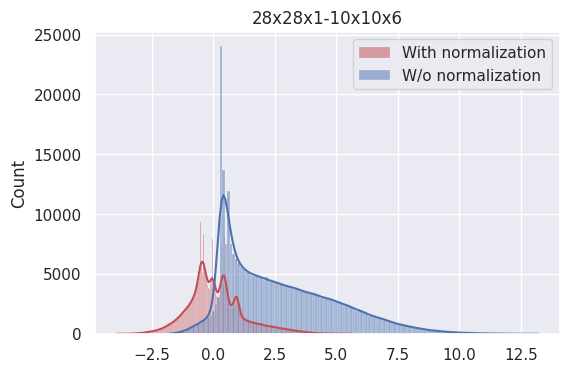

20 batches        with Normalization:  0.391682893037796        W/o Normalization:  0.5552532076835632


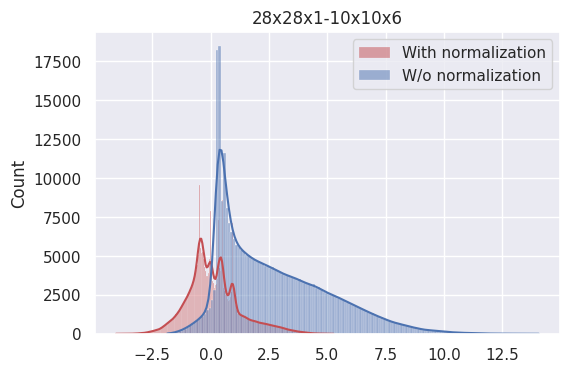

30 batches        with Normalization:  0.32652413845062256        W/o Normalization:  0.5200384259223938


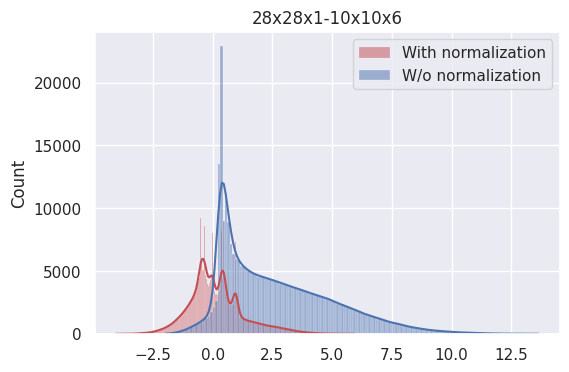

40 batches        with Normalization:  0.3477981984615326        W/o Normalization:  0.48741522431373596


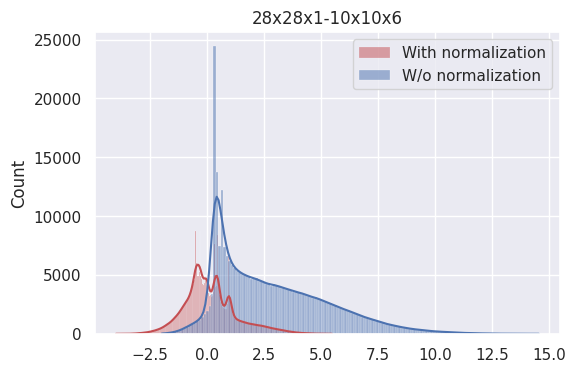

50 batches        with Normalization:  0.29957956075668335        W/o Normalization:  0.4937450885772705


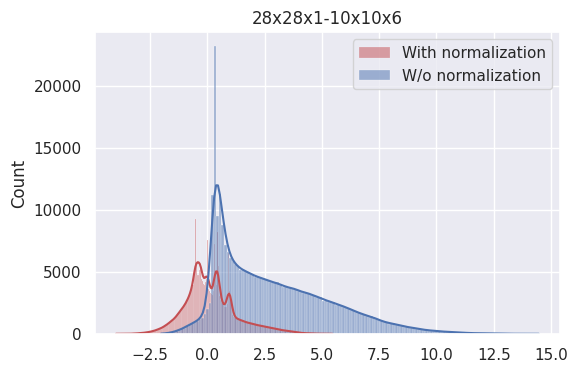

60 batches        with Normalization:  0.30762097239494324        W/o Normalization:  0.4782501757144928


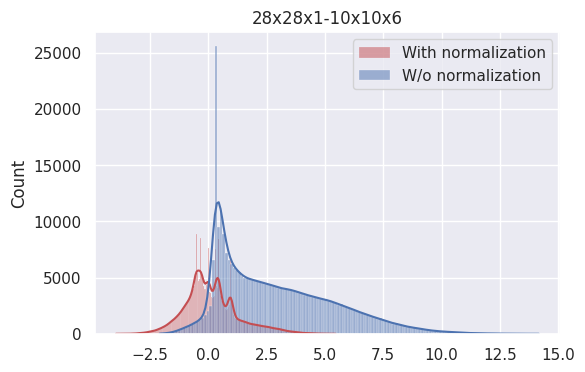

70 batches        with Normalization:  0.28519976139068604        W/o Normalization:  0.40170153975486755


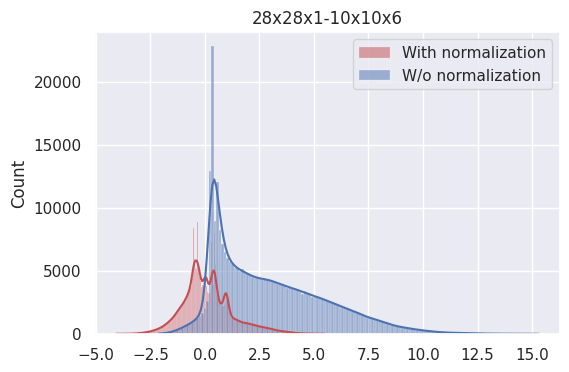

80 batches        with Normalization:  0.26145219802856445        W/o Normalization:  0.4523940086364746


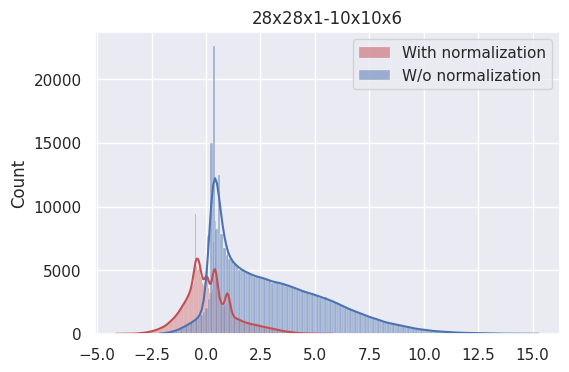

90 batches        with Normalization:  0.29358550906181335        W/o Normalization:  0.49294543266296387


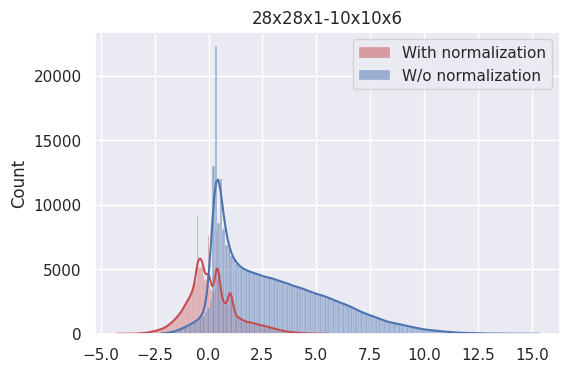

100 batches        with Normalization:  0.2328798770904541        W/o Normalization:  0.41264647245407104


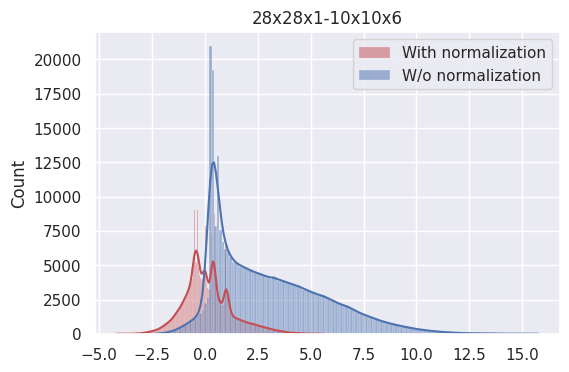

110 batches        with Normalization:  0.301481693983078        W/o Normalization:  0.511587917804718


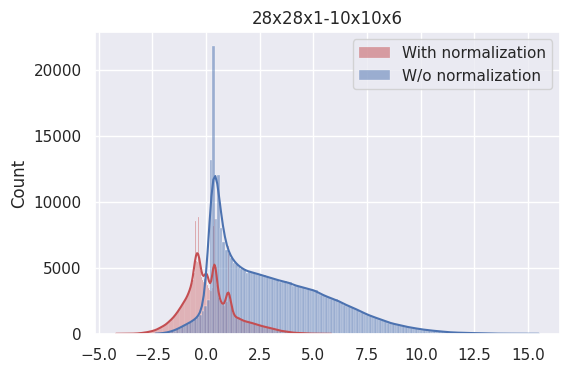

Epoch: 4
10 batches        with Normalization:  0.2778899371623993        W/o Normalization:  0.4535519480705261


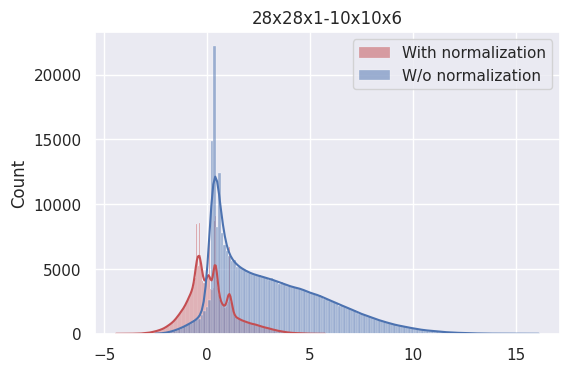

20 batches        with Normalization:  0.24207019805908203        W/o Normalization:  0.4183540642261505


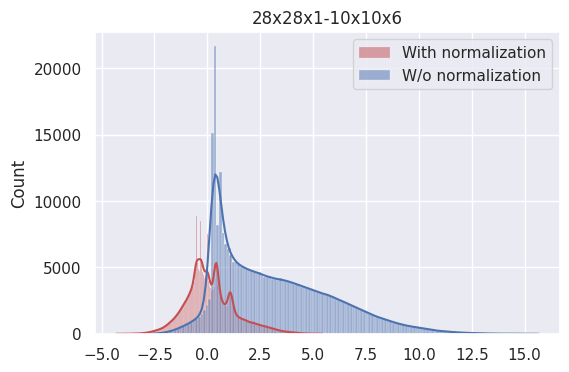

30 batches        with Normalization:  0.22449864447116852        W/o Normalization:  0.4409542381763458


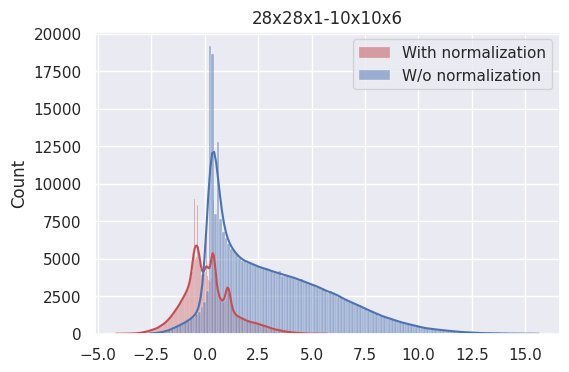

40 batches        with Normalization:  0.24592971801757812        W/o Normalization:  0.3682083785533905


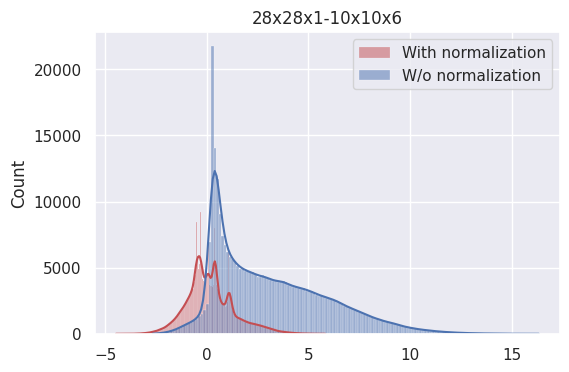

50 batches        with Normalization:  0.24440214037895203        W/o Normalization:  0.4195110499858856


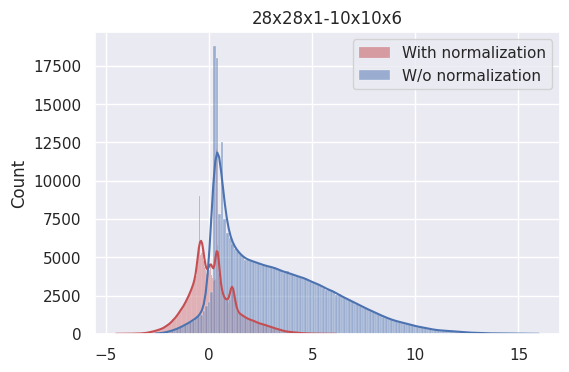

60 batches        with Normalization:  0.20498675107955933        W/o Normalization:  0.35486680269241333


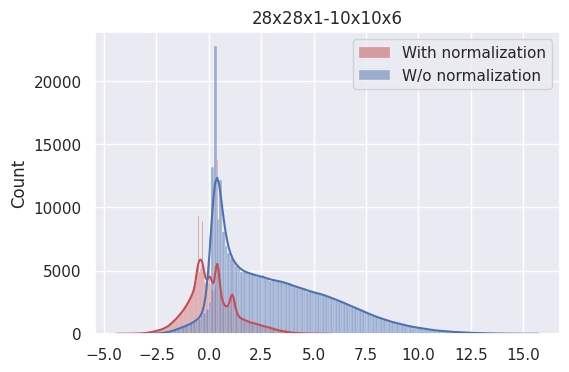

70 batches        with Normalization:  0.24735786020755768        W/o Normalization:  0.42139530181884766


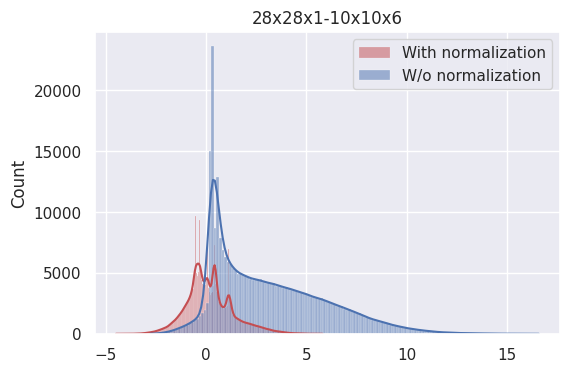

80 batches        with Normalization:  0.22683104872703552        W/o Normalization:  0.381905198097229


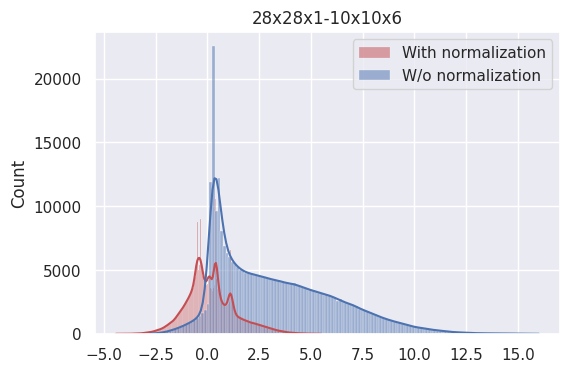

90 batches        with Normalization:  0.24657410383224487        W/o Normalization:  0.49052712321281433


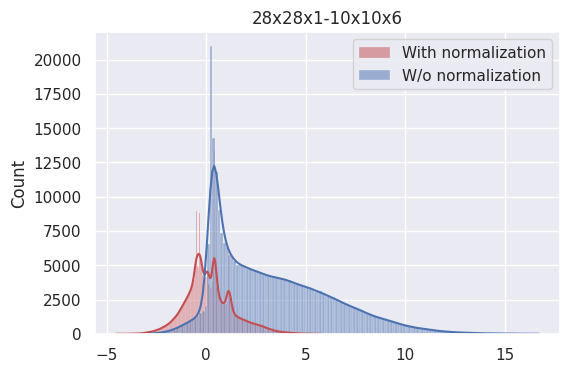

100 batches        with Normalization:  0.238847553730011        W/o Normalization:  0.4695439636707306


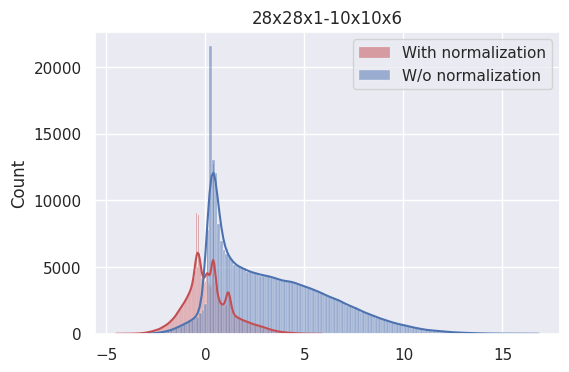

110 batches        with Normalization:  0.19885757565498352        W/o Normalization:  0.35021892189979553


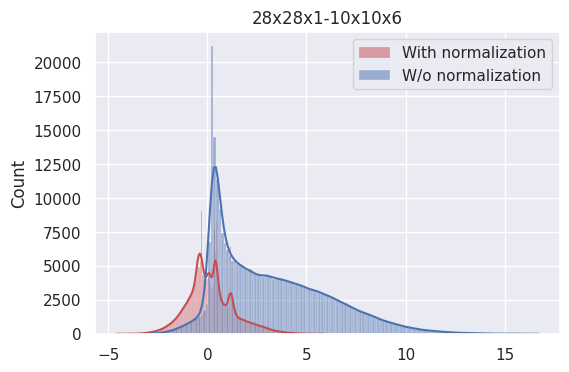

Epoch: 5
10 batches        with Normalization:  0.17376863956451416        W/o Normalization:  0.34032636880874634


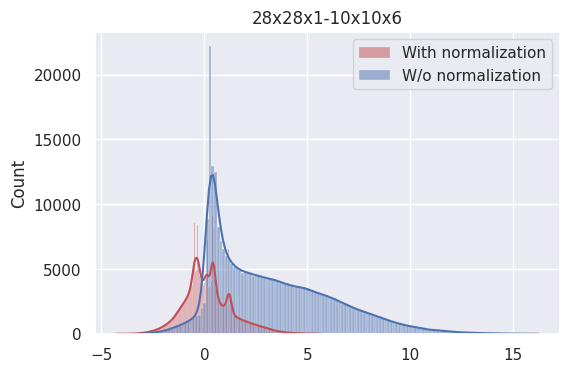

20 batches        with Normalization:  0.21089695394039154        W/o Normalization:  0.3496538996696472


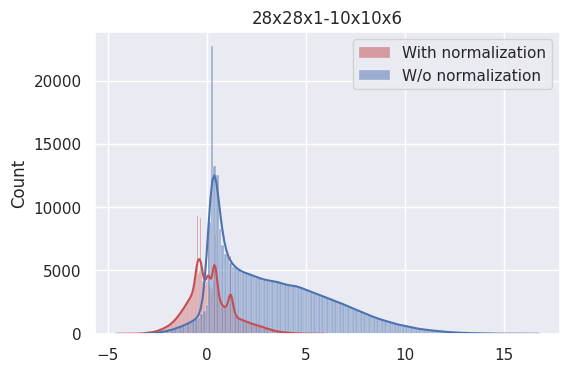

30 batches        with Normalization:  0.20867198705673218        W/o Normalization:  0.3894234597682953


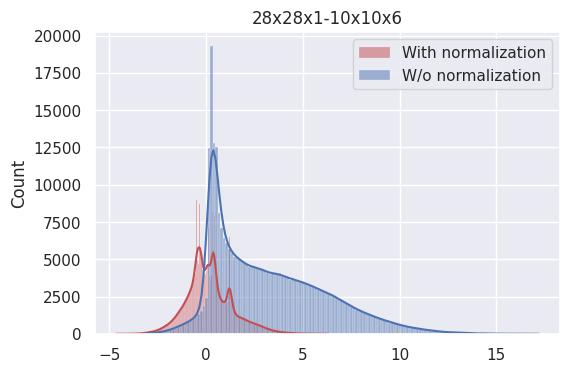

40 batches        with Normalization:  0.2319839745759964        W/o Normalization:  0.3688620626926422


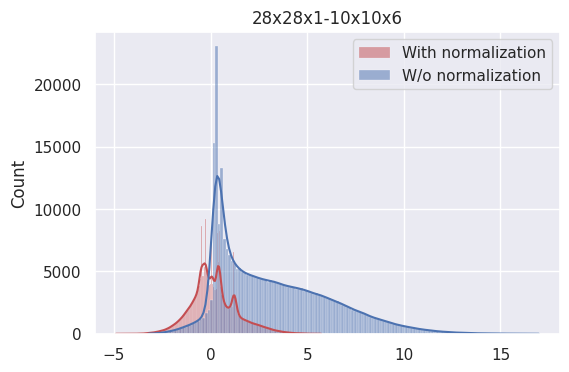

50 batches        with Normalization:  0.1695268303155899        W/o Normalization:  0.37939247488975525


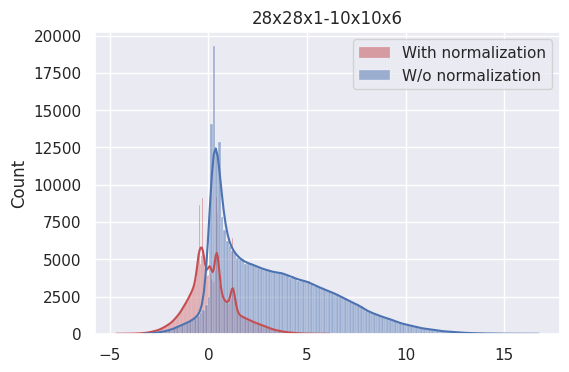

60 batches        with Normalization:  0.1738462895154953        W/o Normalization:  0.36277541518211365


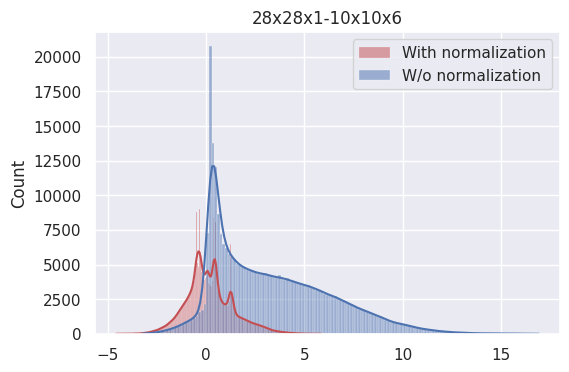

70 batches        with Normalization:  0.20044618844985962        W/o Normalization:  0.32874953746795654


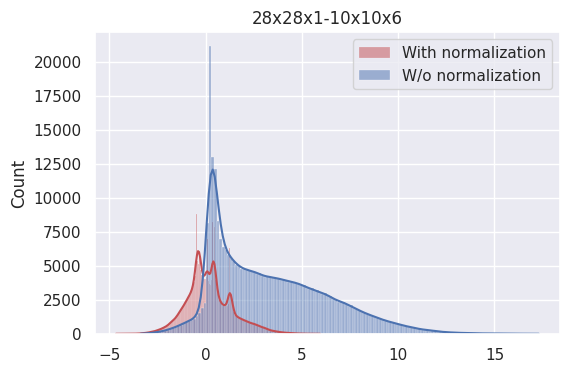

80 batches        with Normalization:  0.1852073222398758        W/o Normalization:  0.33476531505584717


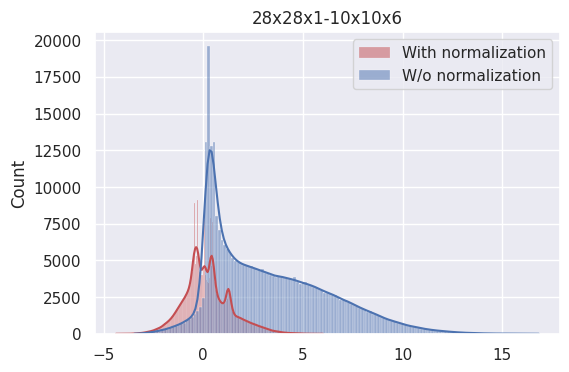

90 batches        with Normalization:  0.19984044134616852        W/o Normalization:  0.39507147669792175


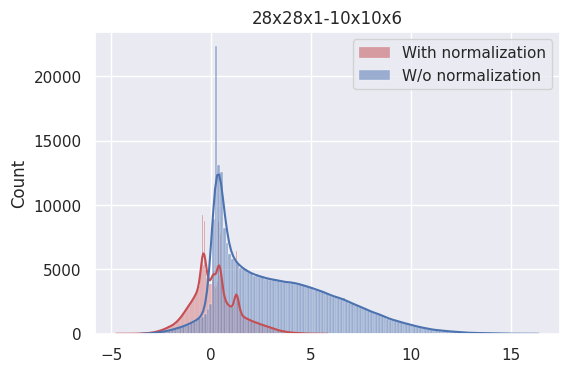

100 batches        with Normalization:  0.19127710163593292        W/o Normalization:  0.35699939727783203


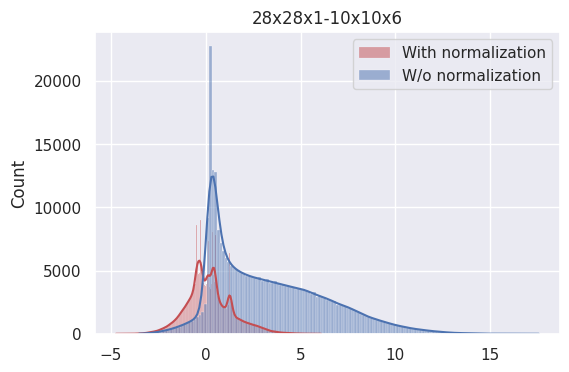

110 batches        with Normalization:  0.19222165644168854        W/o Normalization:  0.36832311749458313


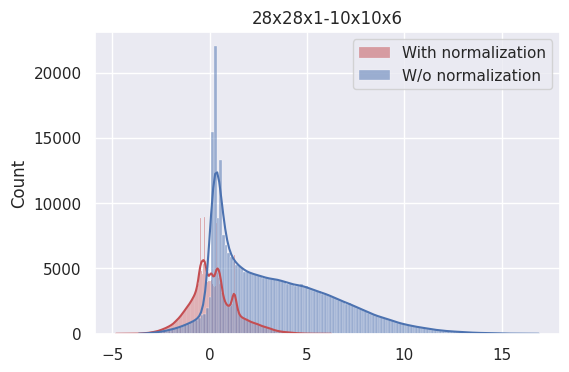

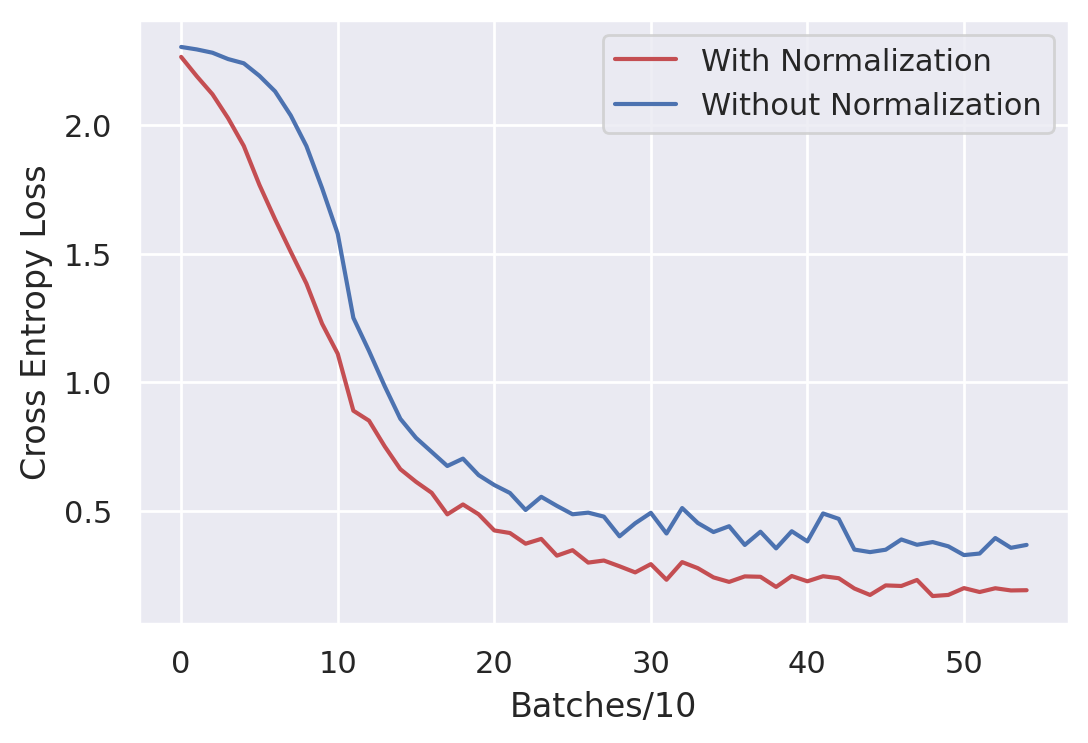

In [9]:
loss = []
loss_no_bn  = []
epochs = 5

for j in tqdm_notebook(range(epochs)): 
  k = 0
  print('Epoch:', j+1)
  for i, data in enumerate(trainloader2,0):
    k += 1

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    opt_no_bn.zero_grad()
    

    output = conv_bn(inputs)
    output_no_bn = conv_no_bn(inputs)


    loss_train = loss_func(output,labels)
    loss_train_no_bn = loss_func(output_no_bn, labels)
    loss_train.backward()
    loss_train_no_bn.backward()

    opt.step()
    opt_no_bn.step()



    if k%10 == 0:
      print(k,'batches','      ','with Normalization: ',loss_train.item(), '      ', 'W/o Normalization: ',loss_train_no_bn.item())
      loss.append(loss_train.item()) 
      loss_no_bn.append(loss_train_no_bn.item())

      conv_bn.eval()
      conv_no_bn.eval()

      output_layer = conv_bn.conv1(inputs)
      output_layer_no_bn = conv_no_bn.conv1(inputs)

      plt.figure(dpi=100)

      sns.histplot(torch.flatten(output_layer).detach().cpu().numpy(),kde=True,color='r',label=('With normalization'))
      sns.histplot(torch.flatten(output_layer_no_bn).detach().cpu().numpy(),kde=True,color='b',label=('W/o normalization'))
      plt.title('28x28x1-10x10x6')
      plt.legend()
      plt.show()

      conv_bn.train()
      conv_no_bn.train()

    del inputs, labels, output
    torch.cuda.empty_cache()

plt.figure(dpi=200)
plt.plot(loss,'r', label='With Normalization')
plt.plot(loss_no_bn, 'b', label= 'Without Normalization')
plt.xlabel('Batches/10')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

#This code block helps us to compare the two networks and train them 
#We train as usual, doing the forward pass, loss computation, backpropagation and optimization
#Once every 10 batches, the model is sent into eval mode, and the inputs are passed through the first sequential of bith the networks
#The outputs are then plotted overlapping each other with the blue region depicting normalization

#RESULTS
#The nature of the output is quite different for both networks, batch normalization keeps the data consistent
#The final loss plots show that the network with normalization has trained better and converges better